In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import sklearn
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,VotingRegressor,StackingRegressor
import joblib

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
car_data=pd.read_csv('CarData.csv')

In [4]:
car_data.head(10)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
5,Maruti Suzuki,Ciaz ZXi,675000,2017,73315,Petrol,Manual,Pune,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0
6,Mercedes-Benz,CLA 200 Petrol Sport,1898999,2015,47000,Petrol,Automatic,Mumbai,White,Second,Individual,1991 cc,181 bhp @ 5500 rpm,300 Nm @ 1200 rpm,FWD,4630.0,1777.0,1432.0,5.0,NaN
7,BMW,X1 xDrive20d M Sport,2650000,2017,75000,Diesel,Automatic,Coimbatore,White,Second,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,AWD,4439.0,1821.0,1612.0,5.0,51.0
8,Skoda,Octavia 1.8 TSI Style Plus AT [2017],1390000,2017,56000,Petrol,Automatic,Mumbai,White,First,Individual,1798 cc,177 bhp @ 5100 rpm,250 Nm @ 1250 rpm,FWD,4670.0,1814.0,1476.0,5.0,50.0
9,Nissan,Terrano XL (D),575000,2015,85000,Diesel,Manual,Mumbai,White,First,Individual,1461 cc,84 bhp @ 3750 rpm,200 Nm @ 1900 rpm,FWD,4331.0,1822.0,1671.0,5.0,50.0


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

# All The Functions Used

In [6]:
def deleteColumn(columnName):
    del car_data[columnName]

In [7]:
def visualizeColumn(columnName):
    sns.barplot(x=car_data[columnName],y=car_data['Price'])
    plt.xticks(rotation=90)
    plt.show()

In [8]:
def fetchFuelType(text):
    if(text=='Petrol' or text=='Diesel' or text=='CNG' or text=='Hybrid'):
        return text
    else:
        return 'Others'

In [9]:
def nanToZero(text):
    if(text=='nan'):
        return '0'
    else:
        return text

In [10]:
def convert_zeros_to_nan(columnName):
    car_data[columnName]=car_data[columnName].replace(0,np.nan)

In [11]:
def transformYear(year):
    if(year>2020):
        return 'Brand New'
    elif(year>2018):
        return 'New'
    elif(year>2014):
        return 'Medium Aged'
    elif(year>2010):
        return 'Old'
    else:
        return 'Very Old'

In [12]:
print(car_data.isnull().sum())

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64


# Data Analysis

In [13]:
car_data['Make'].value_counts()

Make
Maruti Suzuki    440
Hyundai          349
Mercedes-Benz    171
Honda            158
Toyota           132
Audi             127
BMW              121
Mahindra         119
Tata              57
Volkswagen        50
Ford              48
Renault           43
Skoda             40
Land Rover        33
Kia               23
Jeep              18
Jaguar            17
MG                17
Nissan            16
Volvo             16
Porsche           15
MINI              11
Datsun             8
Chevrolet          7
Lexus              6
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Fiat               2
Maserati           1
Ferrari            1
Lamborghini        1
Name: count, dtype: int64

<Axes: xlabel='Make'>

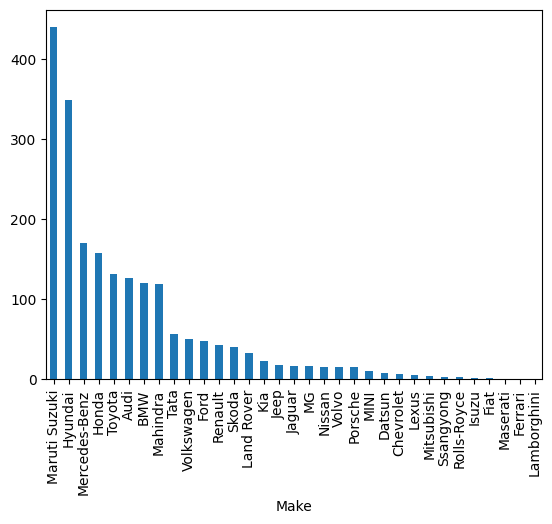

In [14]:
car_data['Make'].value_counts().plot(kind='bar')

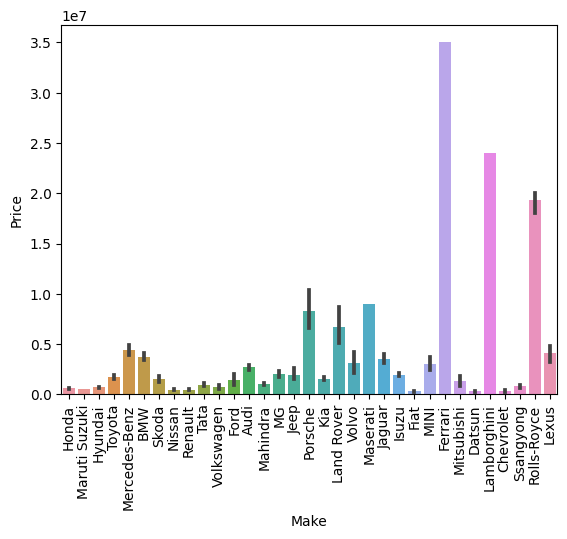

In [15]:
#We check if company name influences selling price
visualizeColumn('Make')

In [16]:
#So car company does matters
car_data['Model'].value_counts()

Model
X1 sDrive20d xLine                 15
Swift DZire VDI                    14
City V                             13
Fortuner 2.8 4x2 AT [2016-2020]    13
Swift DZire VXI                    12
                                   ..
XF R 5.0 V8 Supercharged            1
Pajero SFX 2.8                      1
Etios G                             1
Marazzo M6 Plus 8 STR               1
Figo Duratec Petrol ZXI 1.2         1
Name: count, Length: 1050, dtype: int64

In [17]:
#We don't care of model name but only about the performance it gives, it's features and brand so remove it
deleteColumn('Model')

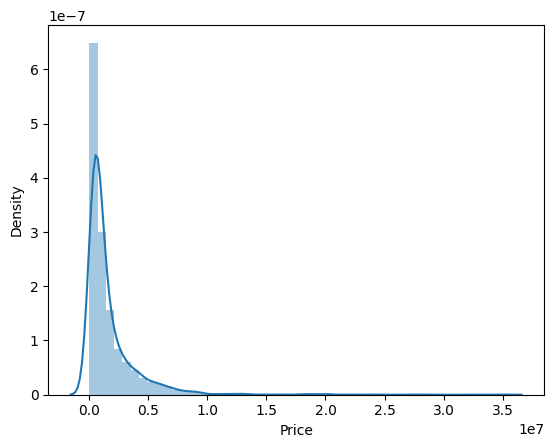

In [18]:
sns.distplot(car_data['Price'])
plt.show()

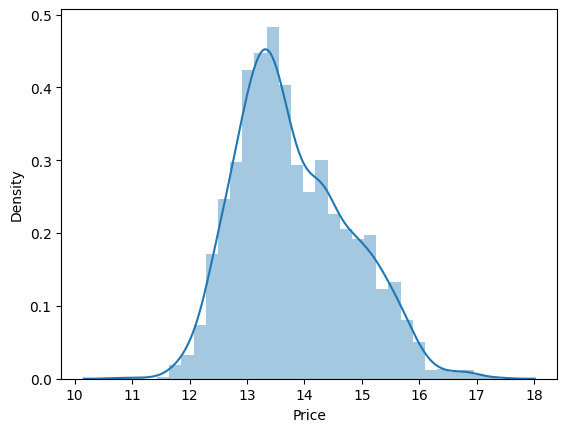

In [19]:
#So there are very few cars having a very high price so the data is skewed
sns.distplot(np.log(car_data['Price']))
plt.show()

<Axes: xlabel='Year'>

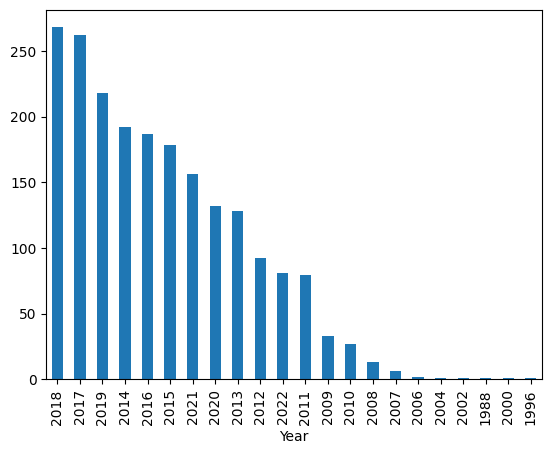

In [20]:
car_data['Year'].value_counts().plot(kind='bar')

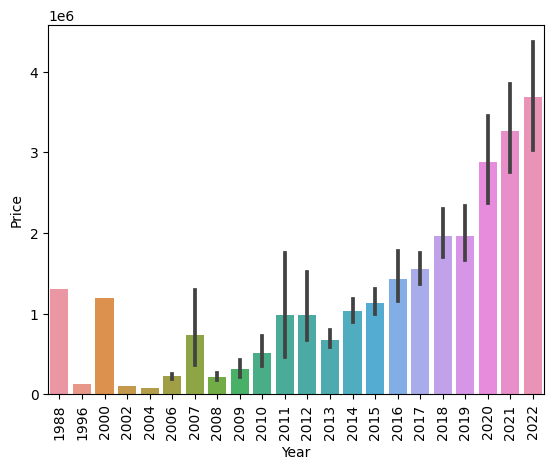

In [21]:
#See if year actually affects price of car
visualizeColumn('Year')

In [22]:
print('Correlation of Year with Price :',car_data['Year'].corr(car_data['Price']))

Correlation of Year with Price : 0.31139953589272285


In [23]:
#So Year is an important column as it is strongly correlated with Price
print('Correlation of Year with Price :',car_data['Kilometer'].corr(car_data['Price']))

Correlation of Year with Price : -0.15082509072345537


<Axes: xlabel='Kilometer', ylabel='Density'>

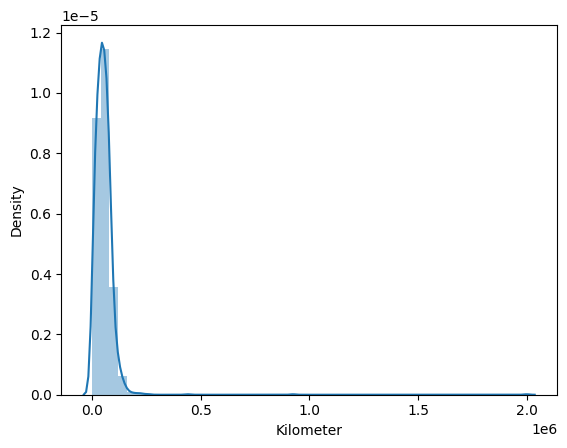

In [24]:
#So as kilometers driven increases the car price decreases as it has a negative correlation
sns.distplot(car_data['Kilometer'])

<Axes: xlabel='Fuel Type'>

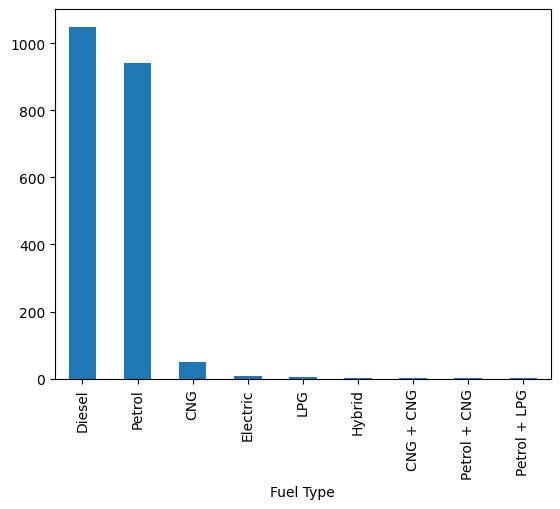

In [25]:
#So highly skewed
car_data['Fuel Type'].value_counts().plot(kind='bar')

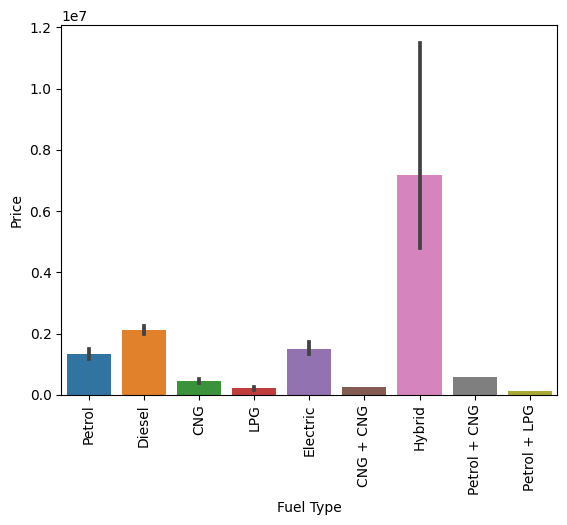

In [26]:
visualizeColumn('Fuel Type')

In [27]:
#So mostly there is diesel petrol and CNG, we can club all others into Others expect Hybrid as it costs exceptionally high
car_data['Fuel Type']=car_data['Fuel Type'].apply(fetchFuelType)

<Axes: xlabel='Transmission'>

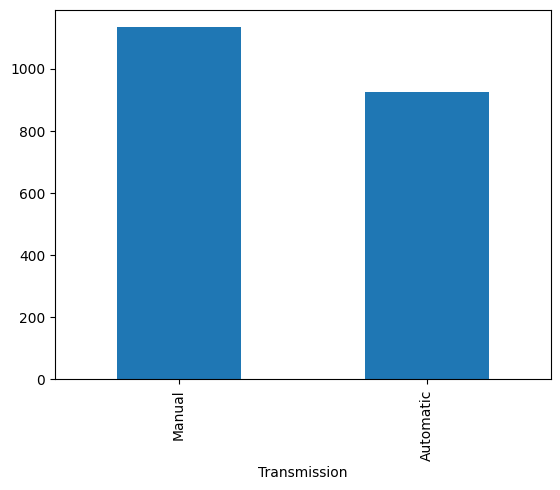

In [28]:
car_data['Transmission'].value_counts().plot(kind='bar')

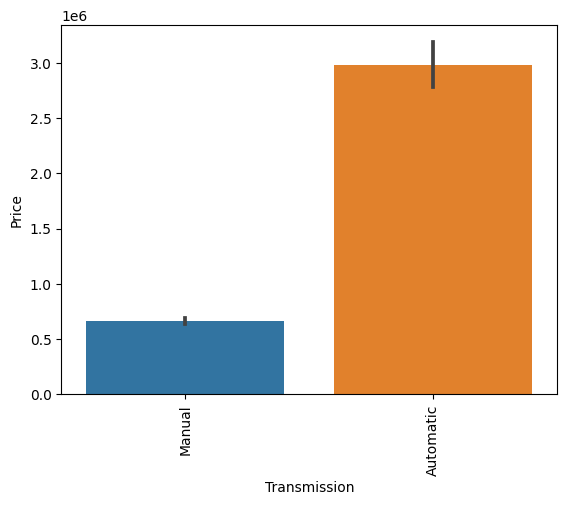

In [29]:
visualizeColumn('Transmission')

<Axes: xlabel='Location'>

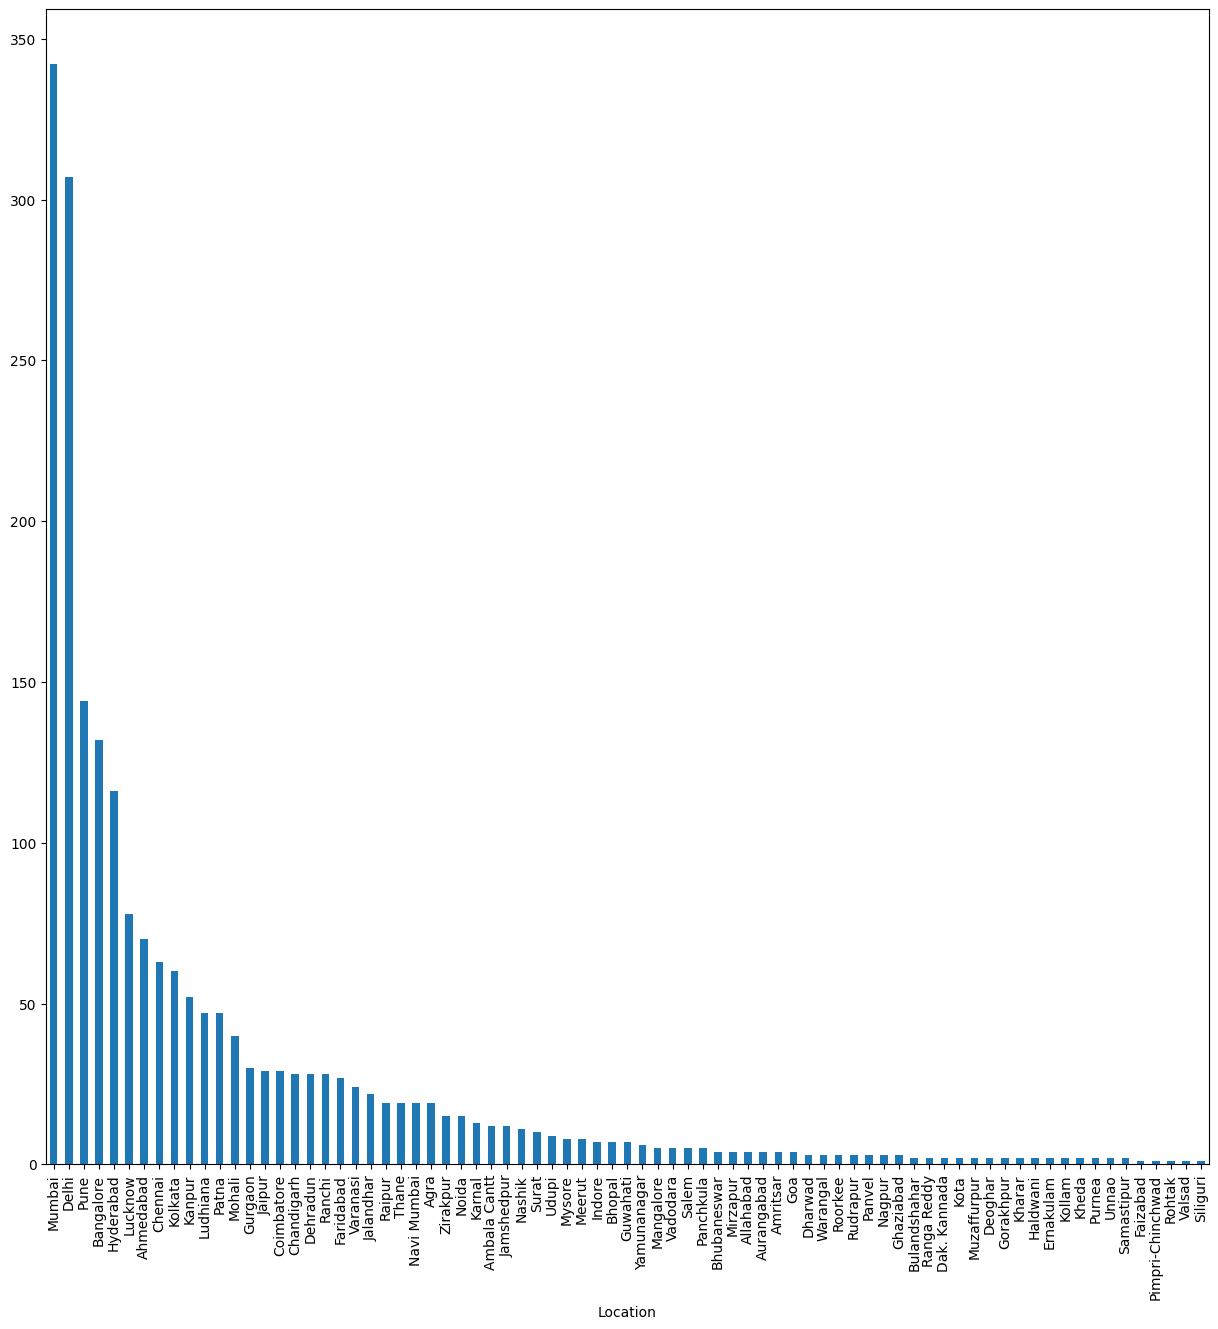

In [30]:
#Automatic on an average costs way higher
plt.figure(figsize=(15,15))
car_data['Location'].value_counts().plot(kind='bar')

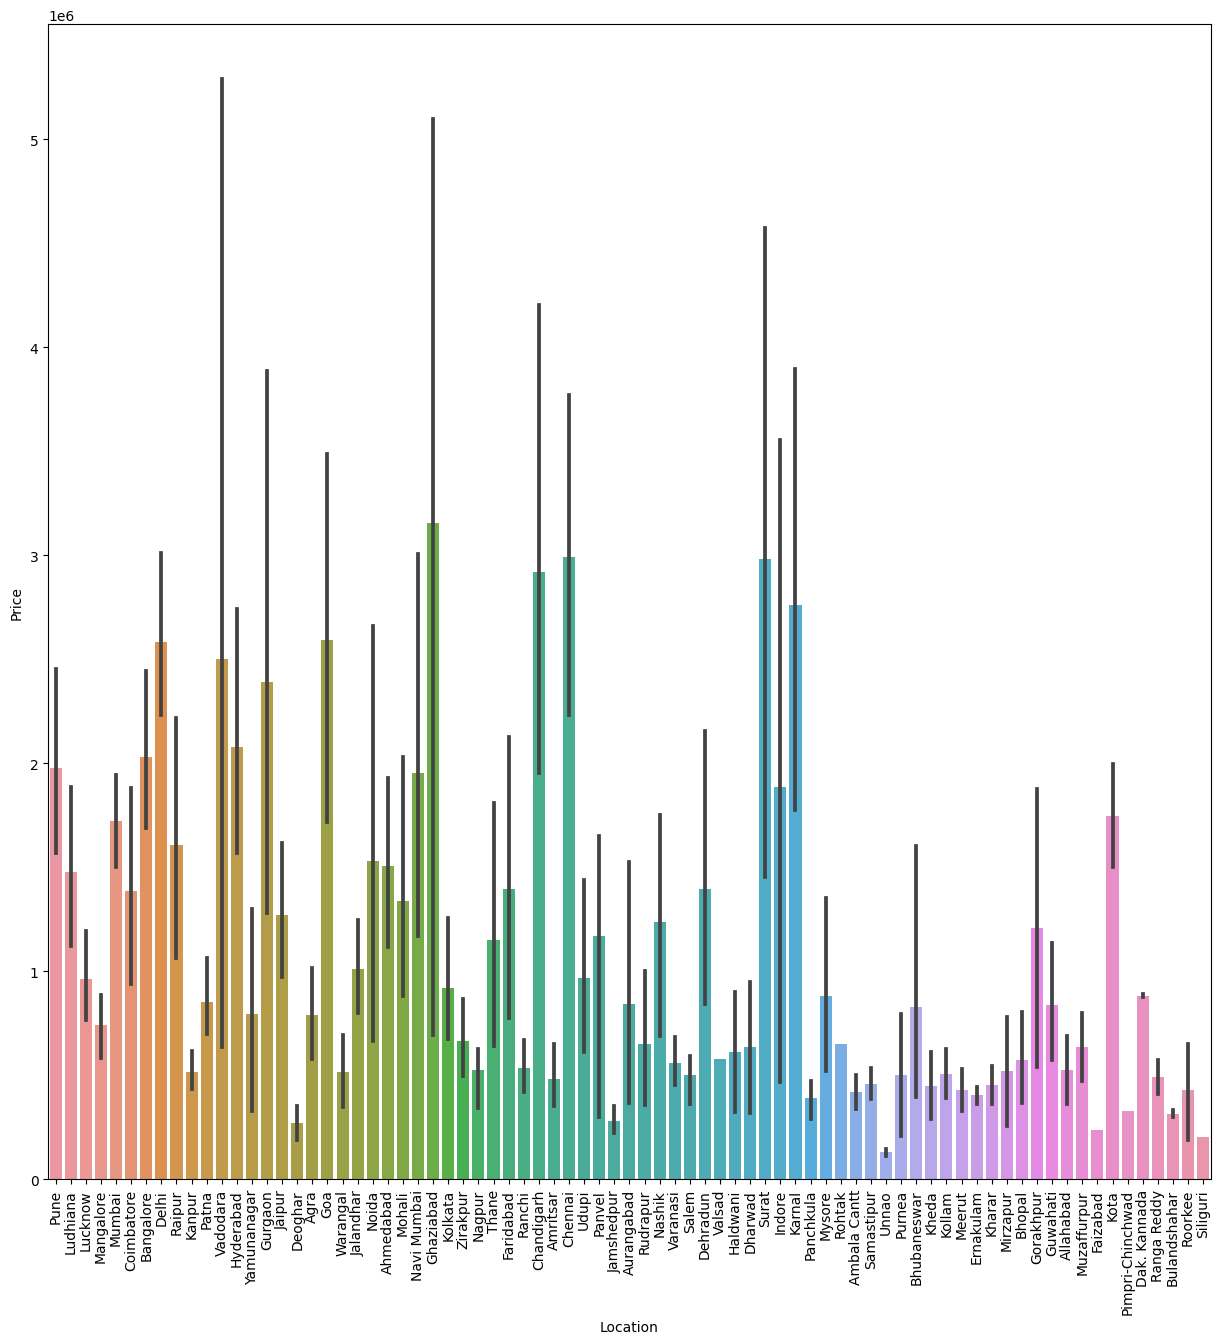

In [31]:
plt.figure(figsize=(15,15))
sns.barplot(x=car_data['Location'],y=car_data['Price'])
plt.xticks(rotation=90)
plt.show()

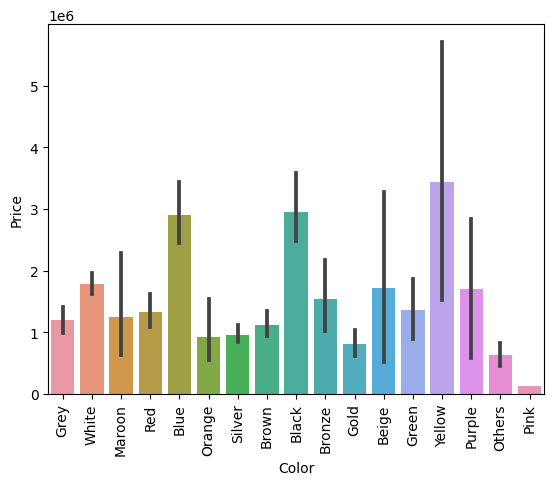

In [32]:
#So price does have a strong correlation with the changing location, we can't drop it
visualizeColumn('Color')

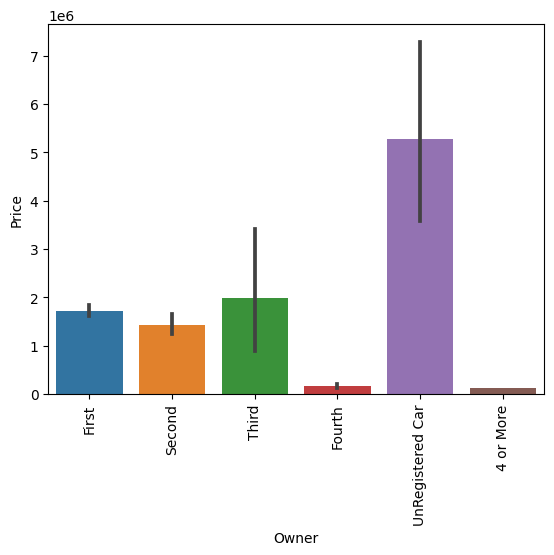

In [33]:
#So color also does matter Blue,Black and Yellow differ than other colorso/
visualizeColumn('Owner')

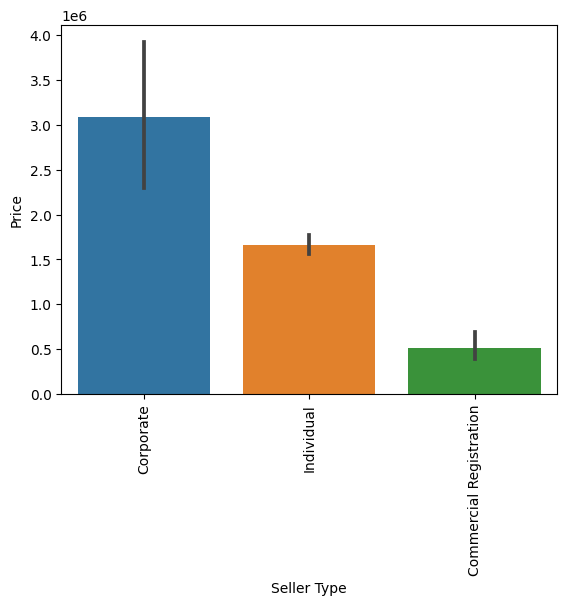

In [34]:
#Clearly Owner also is very important factor
visualizeColumn('Seller Type')

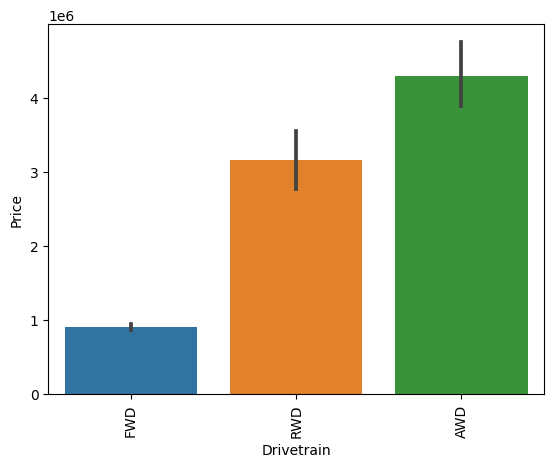

In [35]:
#Again if Seller is Corporate then it's price does increase
visualizeColumn('Drivetrain')

<Axes: xlabel='Length', ylabel='Price'>

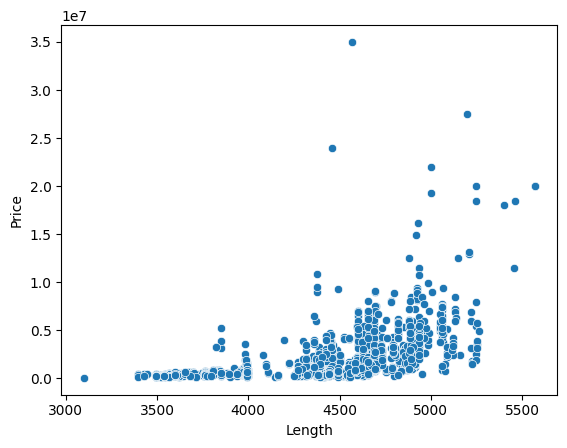

In [36]:
#So again it does influence the price
sns.scatterplot(x=car_data['Length'],y=car_data['Price'])

<Axes: xlabel='Width', ylabel='Price'>

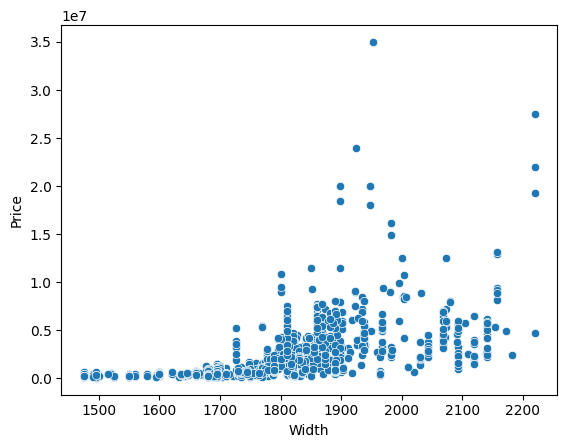

In [37]:
#So nearly a quadratic relationship
sns.scatterplot(x=car_data['Width'],y=car_data['Price'])

<Axes: xlabel='Height', ylabel='Price'>

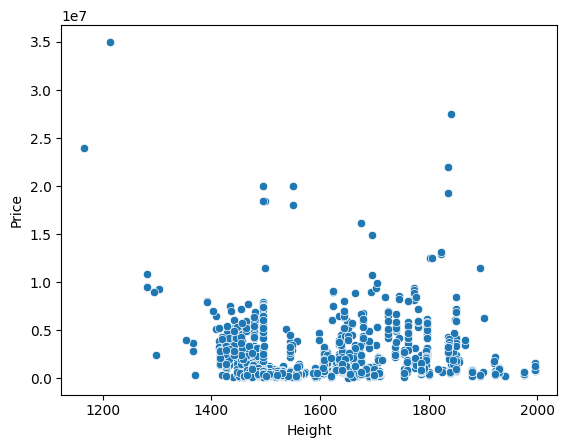

In [38]:
#Again quadratic nearly
sns.scatterplot(x=car_data['Height'],y=car_data['Price'])

In [40]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Price               2059 non-null   int64  
 2   Year                2059 non-null   int64  
 3   Kilometer           2059 non-null   int64  
 4   Fuel Type           2059 non-null   object 
 5   Transmission        2059 non-null   object 
 6   Location            2059 non-null   object 
 7   Color               2059 non-null   object 
 8   Owner               2059 non-null   object 
 9   Seller Type         2059 non-null   object 
 10  Engine              1979 non-null   object 
 11  Max Power           1979 non-null   object 
 12  Max Torque          1979 non-null   object 
 13  Drivetrain          1923 non-null   object 
 14  Length              1995 non-null   float64
 15  Width               1995 non-null   float64
 16  Height

In [41]:
numerical_features=['Price','Year','Kilometer','Length','Width','Height','Seating Capacity','Fuel Tank Capacity']

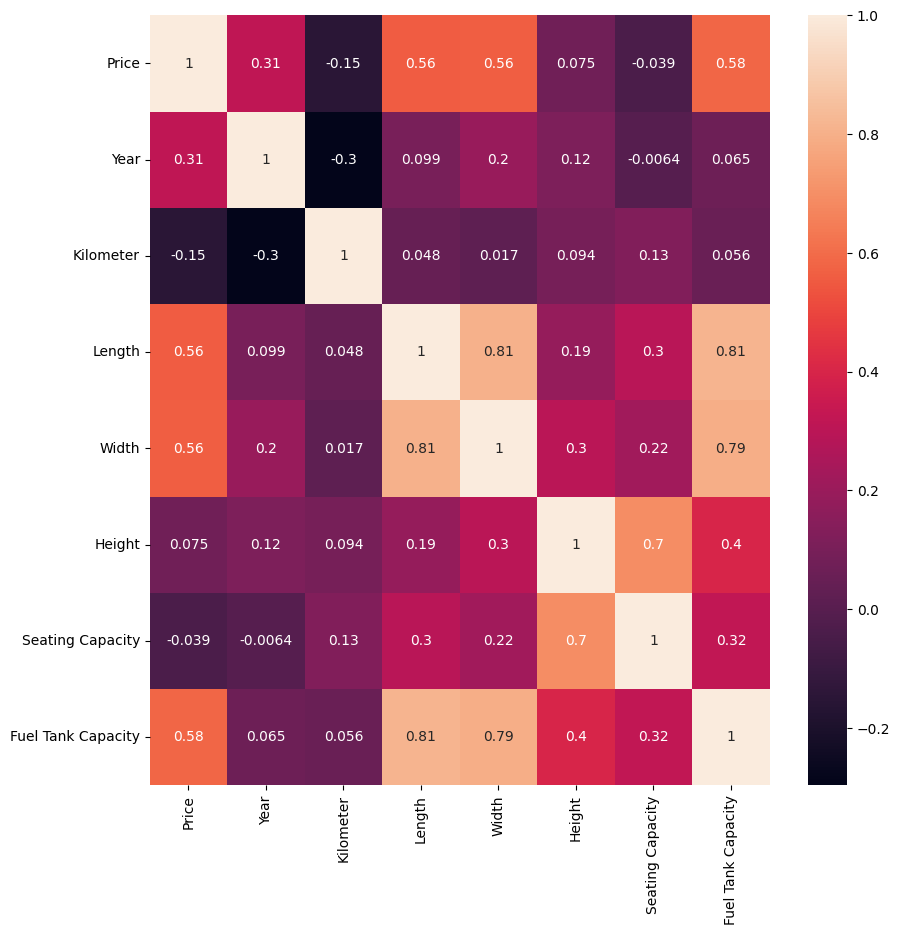

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(car_data[numerical_features].corr(),annot=True)
plt.show()

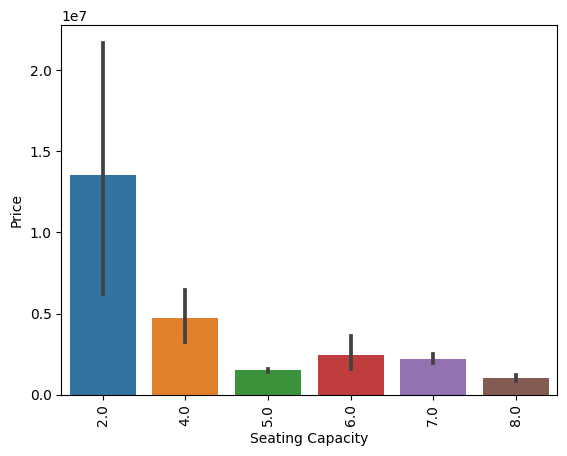

In [46]:
visualizeColumn('Seating Capacity')

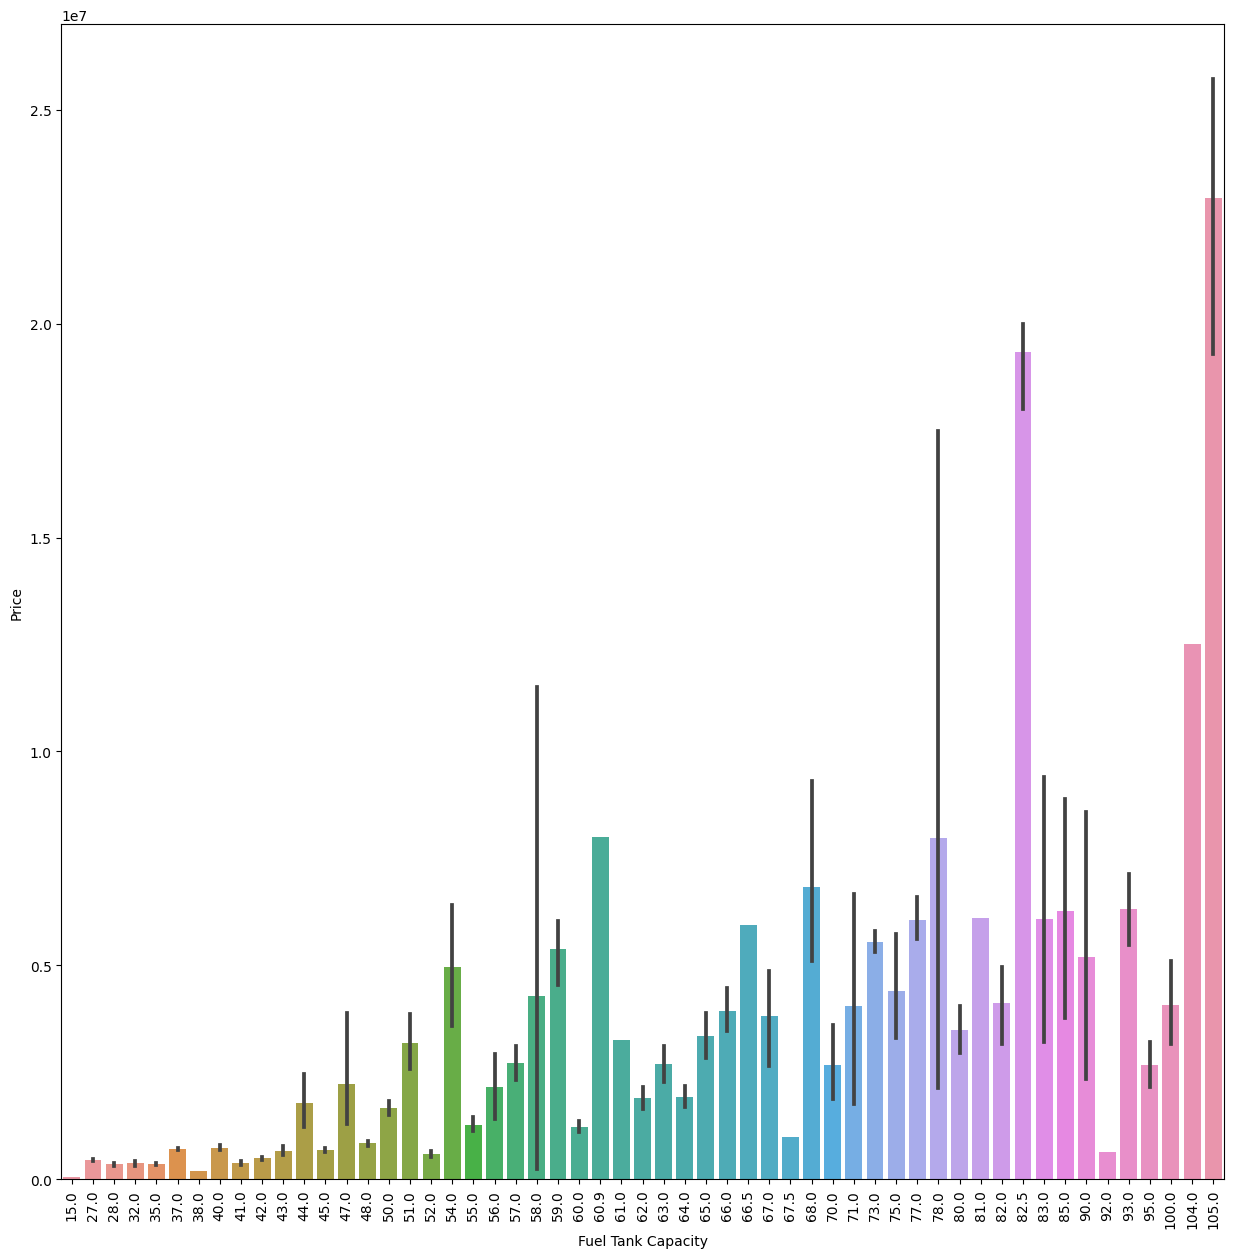

In [47]:
plt.figure(figsize=(15,15))
visualizeColumn('Fuel Tank Capacity')

In [48]:
#So clearly strongly correlation with price
car_data['Engine']=(car_data['Engine'].astype('str')).apply(lambda x: x.split()[0])

In [49]:
car_data['Engine'].unique()

array(['1198', '1248', '1197', '2393', '1373', '1991', '1995', '1798',
       '1461', '999', '1462', '1956', '998', '796', '1591', '1086',
       '1199', '1582', 'nan', '1047', '2143', '1968', '1796', '2498',
       '2494', '2179', '1998', '1497', '1196', '2755', '1799', '1493',
       '1399', '1498', '1997', '1598', '2993', '2995', '2982', '1353',
       '1984', '2967', '2609', '1950', '1999', '4663', '1451', '2354',
       '1396', '2987', '2997', '1336', '4163', '3496', '799', '2979',
       '4806', '2996', '1061', '2184', '2497', '2999', '1948', '3436',
       '2925', '2489', '1368', '1797', '1298', '2694', '1186', '1364',
       '3498', '3982', '1120', '2523', '1988', '3902', '624', '2477',
       '3198', '5204', '814', '2953', '1496', '1499', '1996', '5461',
       '1395', '2835', '2148', '2696', '1794', '1969', '6592', '2199',
       '4951', '1495', '2487', '2998', '2198', '2157', '1595', '1586',
       '936', '1332', '2400', '793', '995'], dtype=object)

In [50]:
#So there is a nan value, for now lets's make that 0
car_data['Engine']=car_data['Engine'].apply(nanToZero).astype('int32')

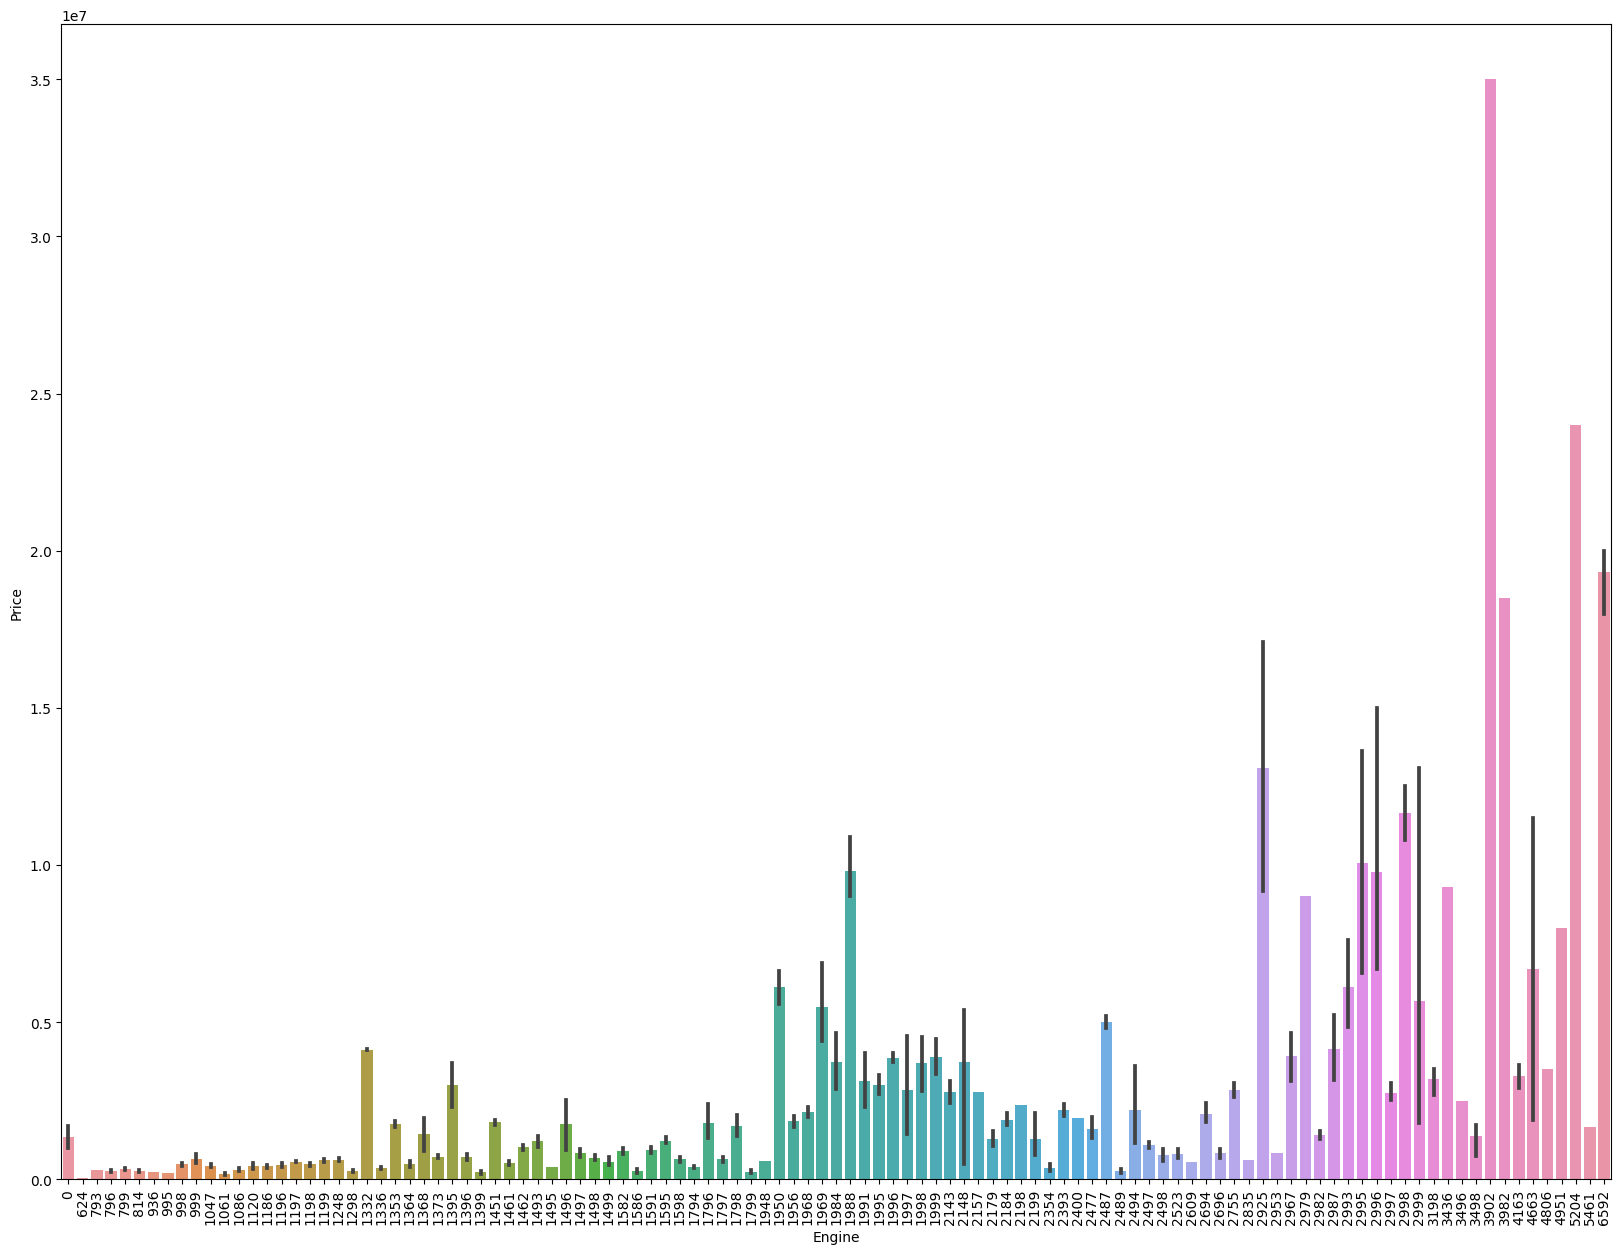

In [51]:
plt.figure(figsize=(20,15))
sns.barplot(x=car_data['Engine'],y=car_data['Price'])
plt.xticks(rotation=90)
plt.show()

In [52]:
#So Engine does changes price, also 0 represents NaN values and not Engine
print('Percentage of NaN values in Engine : ',Counter(car_data['Engine'])[0]*100/len(car_data),'%')

Percentage of NaN values in Engine :  3.885381253035454 %


In [53]:
convert_zeros_to_nan('Engine')

In [54]:
car_data['Max Power'].unique()

array(['87 bhp @ 6000 rpm', '74 bhp @ 4000 rpm', '79 bhp @ 6000 rpm',
       '82 bhp @ 6000 rpm', '148 bhp @ 3400 rpm', '91 bhp @ 6000 rpm',
       '181 bhp @ 5500 rpm', '188 bhp @ 4000 rpm', '177 bhp @ 5100 rpm',
       '84 bhp @ 3750 rpm', '67 bhp @ 5500 rpm', '103 bhp @ 6000 rpm',
       '138 bhp @ 3750 rpm', '103 bhp @ 5000 rpm', '67 bhp @ 6000 rpm',
       '47 bhp @ 6000 rpm', '122 bhp @ 6400 rpm', '68 bhp @ 5500 rpm',
       '118 bhp @ 6000 rpm', '58 bhp @ 6000 rpm', '85 bhp @ 6000 rpm',
       '89 bhp @ 6000 rpm', '126 bhp @ 4000 rpm', '124 bhp @ 6000 rpm',
       nan, '62 bhp @ 5500 rpm', '84 bhp @ 6000 rpm', '69 bhp @ 4000 rpm',
       '168 bhp @ 3000 rpm', '203 bhp @ 4200 rpm', '138 bhp @ 6400 rpm',
       '177 bhp @ 4200 rpm', '165@5500', '105 bhp @ 3800 rpm',
       '83 bhp @ 6000 rpm', '89 bhp @ 4000 rpm', '169 bhp @ 3750 rpm',
       '101 bhp @ 3600 rpm', '190 bhp @ 4000 rpm', '171 bhp @ 3750 rpm',
       '120 bhp @ 4000 rpm', '181 bhp @ 5000 rpm', '117 bhp @ 6600 rpm',
 

In [55]:
for i, desc in enumerate(car_data['Max Power'].astype('str')):
    # Extract the first number before 'bhp'
    match_bhp=re.search(r'(\d+)\s*bhp',desc)
    if match_bhp:
        car_data.loc[i,'BHP']=int(match_bhp.group(1))
    
    # Extract the second number before 'rpm'
    match_rpm=re.search(r'(\d+)\s*rpm',desc)
    if match_rpm:
        car_data.loc[i,'RPM']=int(match_rpm.group(1))

In [56]:
for i, desc in enumerate(car_data['Max Torque'].astype('str')):
    # Extract the first number before 'bhp'
    match_bhp=re.search(r'(\d+)\s*Nm',desc)
    if match_bhp:
        car_data.loc[i,'Nm']=int(match_bhp.group(1))
    
    # Extract the second number before 'rpm'
    match_rpm=re.search(r'(\d+)\s*rpm',desc)
    if match_rpm:
        car_data.loc[i,'RPM Torque']=int(match_rpm.group(1))

In [57]:
car_data.head(10)

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,BHP,RPM,Nm,RPM Torque
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,...,FWD,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0,4500.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,...,FWD,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0,2000.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,...,FWD,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,7619.0,4000.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,...,FWD,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0,4200.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,...,RWD,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0,1400.0
5,Maruti Suzuki,675000,2017,73315,Petrol,Manual,Pune,Grey,First,Individual,...,FWD,4490.0,1730.0,1485.0,5.0,43.0,91.0,6000.0,130.0,4000.0
6,Mercedes-Benz,1898999,2015,47000,Petrol,Automatic,Mumbai,White,Second,Individual,...,FWD,4630.0,1777.0,1432.0,5.0,NaN,181.0,5500.0,300.0,1200.0
7,BMW,2650000,2017,75000,Diesel,Automatic,Coimbatore,White,Second,Individual,...,AWD,4439.0,1821.0,1612.0,5.0,51.0,188.0,4000.0,400.0,1750.0
8,Skoda,1390000,2017,56000,Petrol,Automatic,Mumbai,White,First,Individual,...,FWD,4670.0,1814.0,1476.0,5.0,50.0,177.0,5100.0,250.0,1250.0
9,Nissan,575000,2015,85000,Diesel,Manual,Mumbai,White,First,Individual,...,FWD,4331.0,1822.0,1671.0,5.0,50.0,84.0,3750.0,200.0,1900.0


In [58]:
deleteColumn('Max Power')
deleteColumn('Max Torque')
deleteColumn('Engine')

In [61]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Price               2059 non-null   int64  
 2   Year                2059 non-null   int64  
 3   Kilometer           2059 non-null   int64  
 4   Fuel Type           2059 non-null   object 
 5   Transmission        2059 non-null   object 
 6   Location            2059 non-null   object 
 7   Color               2059 non-null   object 
 8   Owner               2059 non-null   object 
 9   Seller Type         2059 non-null   object 
 10  Drivetrain          1923 non-null   object 
 11  Length              1995 non-null   float64
 12  Width               1995 non-null   float64
 13  Height              1995 non-null   float64
 14  Seating Capacity    1995 non-null   float64
 15  Fuel Tank Capacity  1946 non-null   float64
 16  BHP   

In [62]:
numerical_features=['Price','Year','Kilometer','Length','Width','Height','Seating Capacity','Fuel Tank Capacity','BHP','RPM','Nm','RPM Torque']

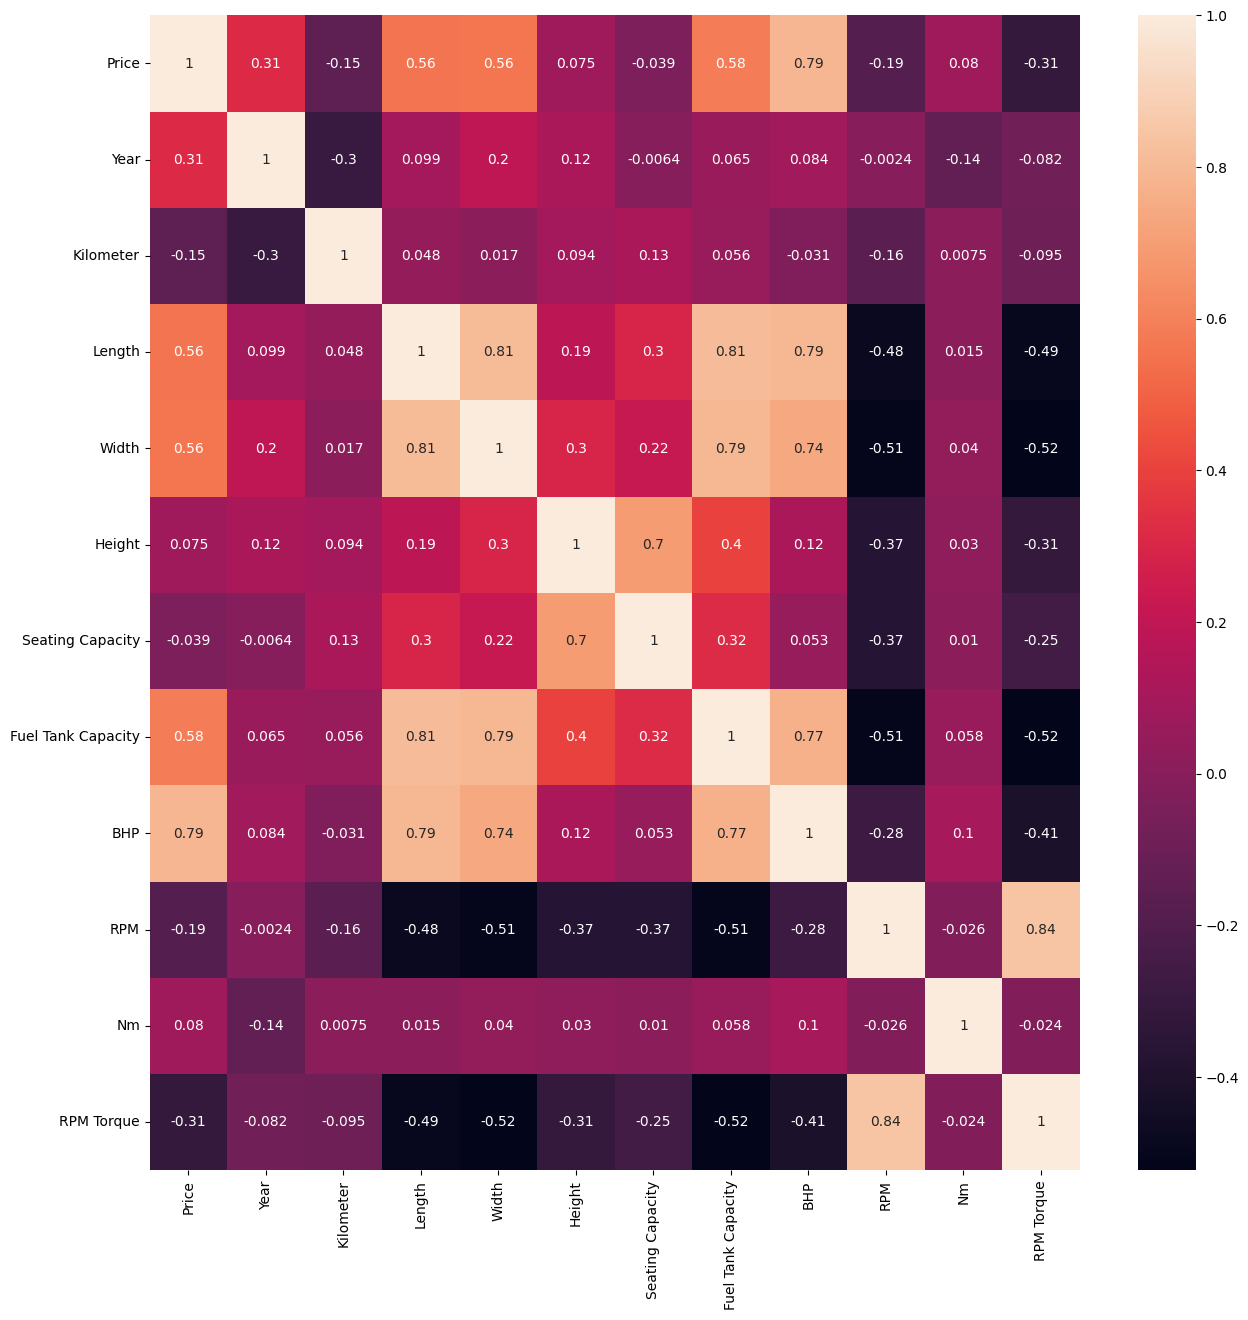

In [63]:
plt.figure(figsize=(15,15))
sns.heatmap(car_data[numerical_features].corr(),annot=True)
plt.show()

# Missing Values

In [64]:
print('Following are the columns along with the percentage of NaN values :')
print(car_data.isnull().sum()*100/len(car_data))

Following are the columns along with the percentage of NaN values :
Make                   0.000000
Price                  0.000000
Year                   0.000000
Kilometer              0.000000
Fuel Type              0.000000
Transmission           0.000000
Location               0.000000
Color                  0.000000
Owner                  0.000000
Seller Type            0.000000
Drivetrain             6.605148
Length                 3.108305
Width                  3.108305
Height                 3.108305
Seating Capacity       3.108305
Fuel Tank Capacity     5.488101
BHP                   10.101991
RPM                   10.296260
Nm                    10.101991
RPM Torque            10.101991
dtype: float64


In [65]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Price               2059 non-null   int64  
 2   Year                2059 non-null   int64  
 3   Kilometer           2059 non-null   int64  
 4   Fuel Type           2059 non-null   object 
 5   Transmission        2059 non-null   object 
 6   Location            2059 non-null   object 
 7   Color               2059 non-null   object 
 8   Owner               2059 non-null   object 
 9   Seller Type         2059 non-null   object 
 10  Drivetrain          1923 non-null   object 
 11  Length              1995 non-null   float64
 12  Width               1995 non-null   float64
 13  Height              1995 non-null   float64
 14  Seating Capacity    1995 non-null   float64
 15  Fuel Tank Capacity  1946 non-null   float64
 16  BHP   

In [66]:
#For Numerical columns : (Length,Width,Height,Fuel Tank Capacity,BHP,RPM,Nm,RPM Torque)
numerical_features=['Length','Width','Height','Fuel Tank Capacity','BHP','RPM','Nm','RPM Torque','Year','Kilometer']
numerical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [67]:
categorical_features=['Make','Fuel Type','Transmission','Location','Color','Owner','Seller Type','Drivetrain','Seating Capacity']
categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(drop='first'))
])

In [68]:
preprocessor=ColumnTransformer(
    [
        ('num',numerical_transformer,numerical_features),
        ('cat',categorical_transformer,categorical_features)
    ]
)

In [69]:
reg=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])

In [70]:
from sklearn import set_config

set_config(display='diagram')
reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Length', 'Width', 'Height',
                                                   'Fuel Tank Capacity', 'BHP',
                                                   'RPM', 'Nm', 'RPM Torque',
                                                   'Year', 'Kilometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Make', 'Fuel Type',
                                                   'Transmission', 'Location',
                                                   'Color', 'Owner',
                                                   'Seller Type', 'Drivetrain',
                                                   'Seating Capacity'])])),
                ('regressor', LinearRegression())])

In [71]:
param_grid={
    'preprocessor__num__imputer__strategy': ['mean','median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent','constant'],
    'preprocessor__num__imputer__add_indicator' : [True,False],
    'preprocessor__cat__imputer__add_indicator' : [True,False]
}
grid_search=GridSearchCV(reg,param_grid,cv=10)

In [72]:
input_data=car_data.drop(columns=['Price'])
output_data=car_data['Price']

In [73]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.15,random_state=0)

In [74]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Length',
                                                                          'Width',
                                                                          'Height',
                                                                          'Fuel '
                                                                          'Tank '
                                                                          'Capacity',
                                                                          'BHP',
                                                                          'RPM',
                                                                          'Nm',
                                                                          'RPM '
                                                                          'Torque',
                                                                          'Year',
                                                                          'Kilometer']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy=...
                                                                          'Color',
                                                                          'Owner',
                                                                          'Seller '
                                                                          'Type',
                                                                          'Drivetrain',
                                                                          'Seating '
                                                                          'Capacity'])])),
                                       ('regressor', LinearRegression())]),
             param_grid={'preprocessor__cat__imputer__add_indicator': [True,
                                                                       False],
                         'preprocessor__cat__imputer__strategy': ['most_frequent',
                                                                  'constant'],
                         'preprocessor__num__imputer__add_indicator': [True,
                                                                       False],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']})

In [75]:
print(f"Best parameters :")
print(grid_search.best_params_)

Best parameters :
{'preprocessor__cat__imputer__add_indicator': True, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__add_indicator': True, 'preprocessor__num__imputer__strategy': 'mean'}


<Axes: xlabel='Drivetrain'>

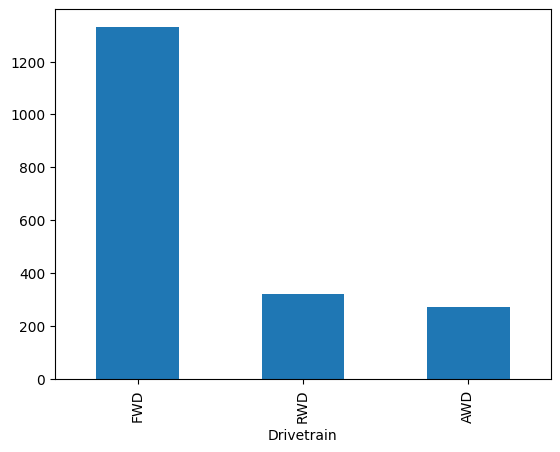

In [76]:
#We got an overall idea , now we analyse individual columns ie. first have a try with these overall best if fails then try other
car_data['Drivetrain'].value_counts().plot(kind='bar')

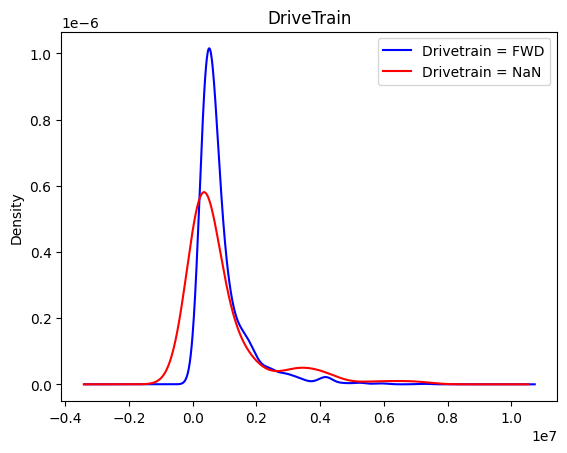

In [77]:
fig=plt.figure()
ax=fig.add_subplot(111)
car_data[car_data['Drivetrain']=='FWD']['Price'].plot(kind='kde',color='blue',ax=ax)
car_data[car_data['Drivetrain'].isnull()]['Price'].plot(kind='kde',color='red',ax=ax)
lines, labels = ax.get_legend_handles_labels()
labels=['Drivetrain = FWD','Drivetrain = NaN']
ax.legend(lines, labels,loc='best')
plt.title('DriveTrain')
plt.show()

In [78]:
#So distribution is peaked lets see if the distribution now changes
car_data['tempDrivetrain']=car_data['Drivetrain'].fillna('FWD')

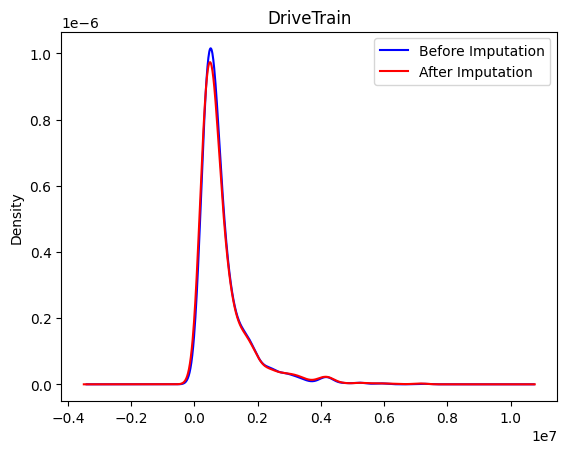

In [79]:
fig=plt.figure()
ax=fig.add_subplot(111)
car_data[car_data['Drivetrain']=='FWD']['Price'].plot(kind='kde',color='blue',ax=ax)
car_data[car_data['tempDrivetrain']=='FWD']['Price'].plot(kind='kde',color='red',ax=ax)
lines, labels = ax.get_legend_handles_labels()
labels=['Before Imputation','After Imputation']
ax.legend(lines, labels,loc='best')
plt.title('DriveTrain')
plt.show()

In [80]:
#So distribution remains nearly the same so we do a fill nan with most frequent
deleteColumn('tempDrivetrain')

In [81]:
car_data['Drivetrain'].fillna('FWD',inplace=True)

In [82]:
car_data['Length'].value_counts()

Length
3995.0    221
4440.0     70
4270.0     57
3985.0     55
4456.0     44
         ... 
4371.0      1
5399.0      1
4969.0      1
3884.0      1
4249.0      1
Name: count, Length: 248, dtype: int64

In [83]:
car_data['LengthMean']=car_data['Length'].fillna(car_data['Length'].mean())

In [84]:
#Now, we check if the variance did change much after mean/median imputation
print('Original Length Variance :',car_data['Length'].var())
print('Mean Imputed Length Variance :',car_data['LengthMean'].var())

Original Length Variance : 195769.53022124016
Mean Imputed Length Variance : 189681.45931056992


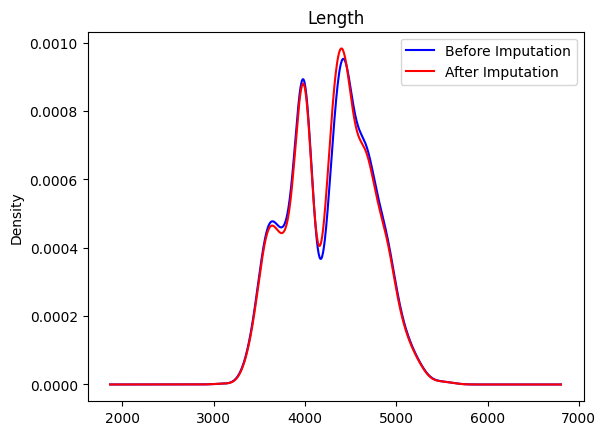

In [85]:
#Nearly the same clear from above
fig=plt.figure()
ax=fig.add_subplot(111)
car_data['Length'].plot(kind='kde',color='blue',ax=ax)
car_data['LengthMean'].plot(kind='kde',color='red',ax=ax)
lines, labels = ax.get_legend_handles_labels()
labels=['Before Imputation','After Imputation']
ax.legend(lines, labels,loc='best')
plt.title('Length')
plt.show()

In [86]:
#So the distribution is the extact same so, we can safely replace by mean
deleteColumn('LengthMean')
car_data['Length'].fillna(car_data['Length'].mean(),inplace=True)

In [87]:
car_data['WidthMean']=car_data['Width'].fillna(car_data['Width'].mean())

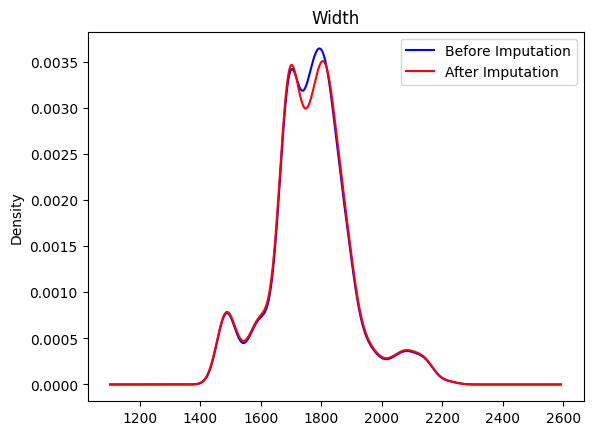

In [88]:
fig=plt.figure()
ax=fig.add_subplot(111)
car_data['WidthMean'].plot(kind='kde',color='blue',ax=ax)
car_data['Width'].plot(kind='kde',color='red',ax=ax)
lines, labels = ax.get_legend_handles_labels()
labels=['Before Imputation','After Imputation']
ax.legend(lines, labels,loc='best')
plt.title('Width')
plt.show()

In [89]:
#Clearly this also gives the nearly same distribution
deleteColumn('WidthMean')
car_data['Width'].fillna(car_data['Width'].mean(),inplace=True)

In [90]:
car_data['HeightMean']=car_data['Height'].fillna(car_data['Height'].mean())

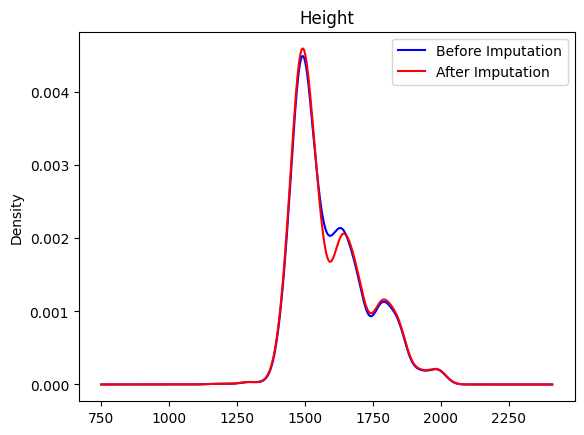

In [91]:
fig=plt.figure()
ax=fig.add_subplot(111)
car_data['HeightMean'].plot(kind='kde',color='blue',ax=ax)
car_data['Height'].plot(kind='kde',color='red',ax=ax)
lines, labels = ax.get_legend_handles_labels()
labels=['Before Imputation','After Imputation']
ax.legend(lines, labels,loc='best')
plt.title('Height')
plt.show()

In [92]:
#Clearly this also gives the nearly same distribution
deleteColumn('HeightMean')
car_data['Height'].fillna(car_data['Height'].mean(),inplace=True)

In [93]:
car_data['Fuel Tank Mean']=car_data['Fuel Tank Capacity'].fillna(car_data['Fuel Tank Capacity'].mean())

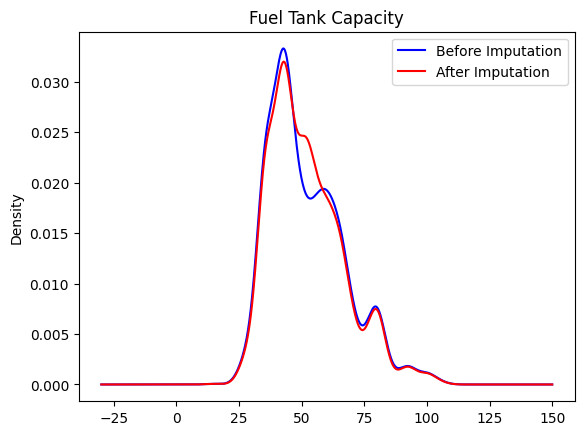

In [94]:
fig=plt.figure()
ax=fig.add_subplot(111)
car_data['Fuel Tank Capacity'].plot(kind='kde',color='blue',ax=ax)
car_data['Fuel Tank Mean'].plot(kind='kde',color='red',ax=ax)
lines, labels = ax.get_legend_handles_labels()
labels=['Before Imputation','After Imputation']
ax.legend(lines, labels,loc='best')
plt.title('Fuel Tank Capacity')
plt.show()

In [95]:
#It does have slightly more deviation
#We try with median
car_data['Fuel Tank Median']=car_data['Fuel Tank Capacity'].fillna(car_data['Fuel Tank Capacity'].median())

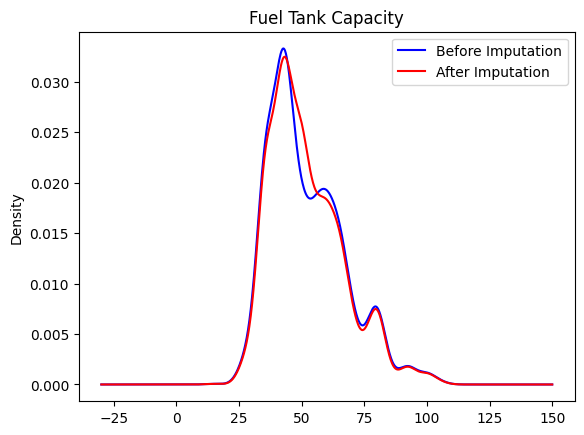

In [96]:
fig=plt.figure()
ax=fig.add_subplot(111)
car_data['Fuel Tank Capacity'].plot(kind='kde',color='blue',ax=ax)
car_data['Fuel Tank Median'].plot(kind='kde',color='red',ax=ax)
lines, labels = ax.get_legend_handles_labels()
labels=['Before Imputation','After Imputation']
ax.legend(lines, labels,loc='best')
plt.title('Fuel Tank Capacity')
plt.show()

In [97]:
#Median does give a better estimate
deleteColumn('Fuel Tank Median')
deleteColumn('Fuel Tank Mean')

In [98]:
car_data['Fuel Tank Capacity'].fillna(car_data['Fuel Tank Capacity'].median(),inplace=True)

<Axes: xlabel='Seating Capacity'>

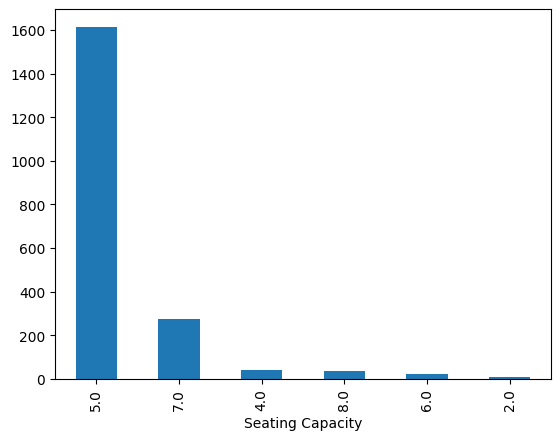

In [99]:
car_data['Seating Capacity'].value_counts().plot(kind='bar')

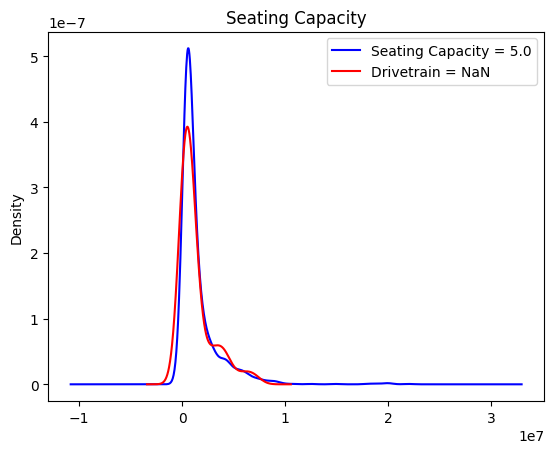

In [100]:
fig=plt.figure()
ax=fig.add_subplot(111)
car_data[car_data['Seating Capacity']==5.0]['Price'].plot(kind='kde',color='blue',ax=ax)
car_data[car_data['Seating Capacity'].isnull()]['Price'].plot(kind='kde',color='red',ax=ax)
lines, labels = ax.get_legend_handles_labels()
labels=['Seating Capacity = 5.0','Drivetrain = NaN']
ax.legend(lines, labels,loc='best')
plt.title('Seating Capacity')
plt.show()

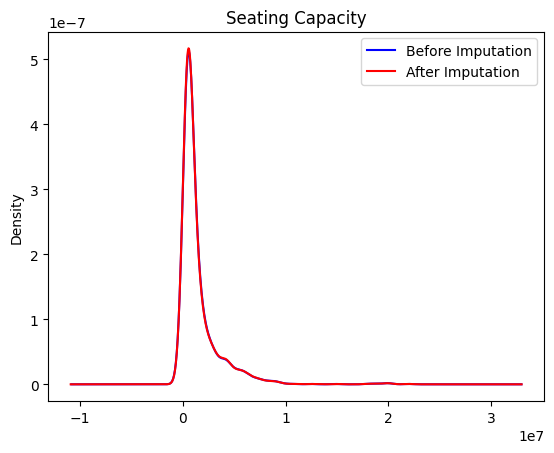

In [101]:
car_data['temp']=car_data['Seating Capacity'].fillna(5.0)
fig=plt.figure()
ax=fig.add_subplot(111)
car_data[car_data['Seating Capacity']==5.0]['Price'].plot(kind='kde',color='blue',ax=ax)
car_data[car_data['temp']==5.0]['Price'].plot(kind='kde',color='red',ax=ax)
lines,labels=ax.get_legend_handles_labels()
labels=['Before Imputation','After Imputation']
ax.legend(lines, labels,loc='best')
plt.title('Seating Capacity')
plt.show()

In [102]:
#So clearly distribution remains the same
deleteColumn('temp')
car_data['Seating Capacity'].fillna(5.0,inplace=True)

In [103]:
#Now, remaining BHP,RPM,Nm,RPM Torque does have more number of NaN values(10%) so, we don't use mean/median/most frequent strategy
columns_to_impute=['BHP','RPM','Nm','RPM Torque']
data_to_impute=car_data[columns_to_impute].values
imputer=KNNImputer()

In [104]:
imputed_data=imputer.fit_transform(data_to_impute)
car_data[columns_to_impute]=imputed_data

In [105]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Price               2059 non-null   int64  
 2   Year                2059 non-null   int64  
 3   Kilometer           2059 non-null   int64  
 4   Fuel Type           2059 non-null   object 
 5   Transmission        2059 non-null   object 
 6   Location            2059 non-null   object 
 7   Color               2059 non-null   object 
 8   Owner               2059 non-null   object 
 9   Seller Type         2059 non-null   object 
 10  Drivetrain          2059 non-null   object 
 11  Length              2059 non-null   float64
 12  Width               2059 non-null   float64
 13  Height              2059 non-null   float64
 14  Seating Capacity    2059 non-null   float64
 15  Fuel Tank Capacity  2059 non-null   float64
 16  BHP   

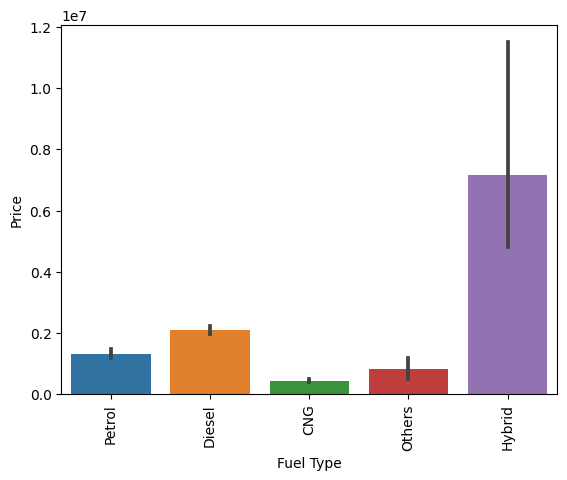

In [106]:
visualizeColumn('Fuel Type')

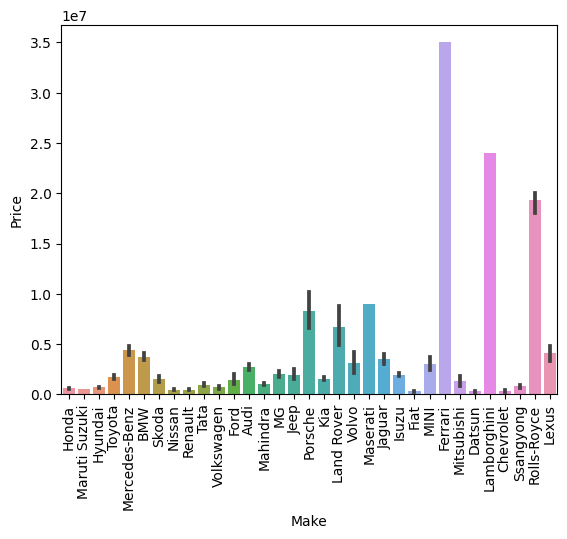

In [107]:
visualizeColumn('Make')

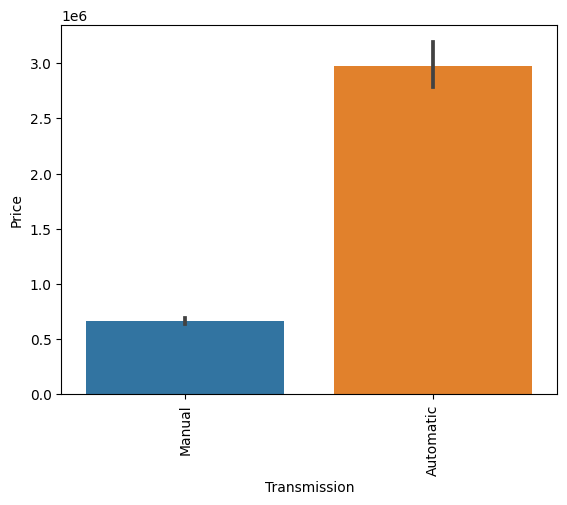

In [108]:
visualizeColumn('Transmission')

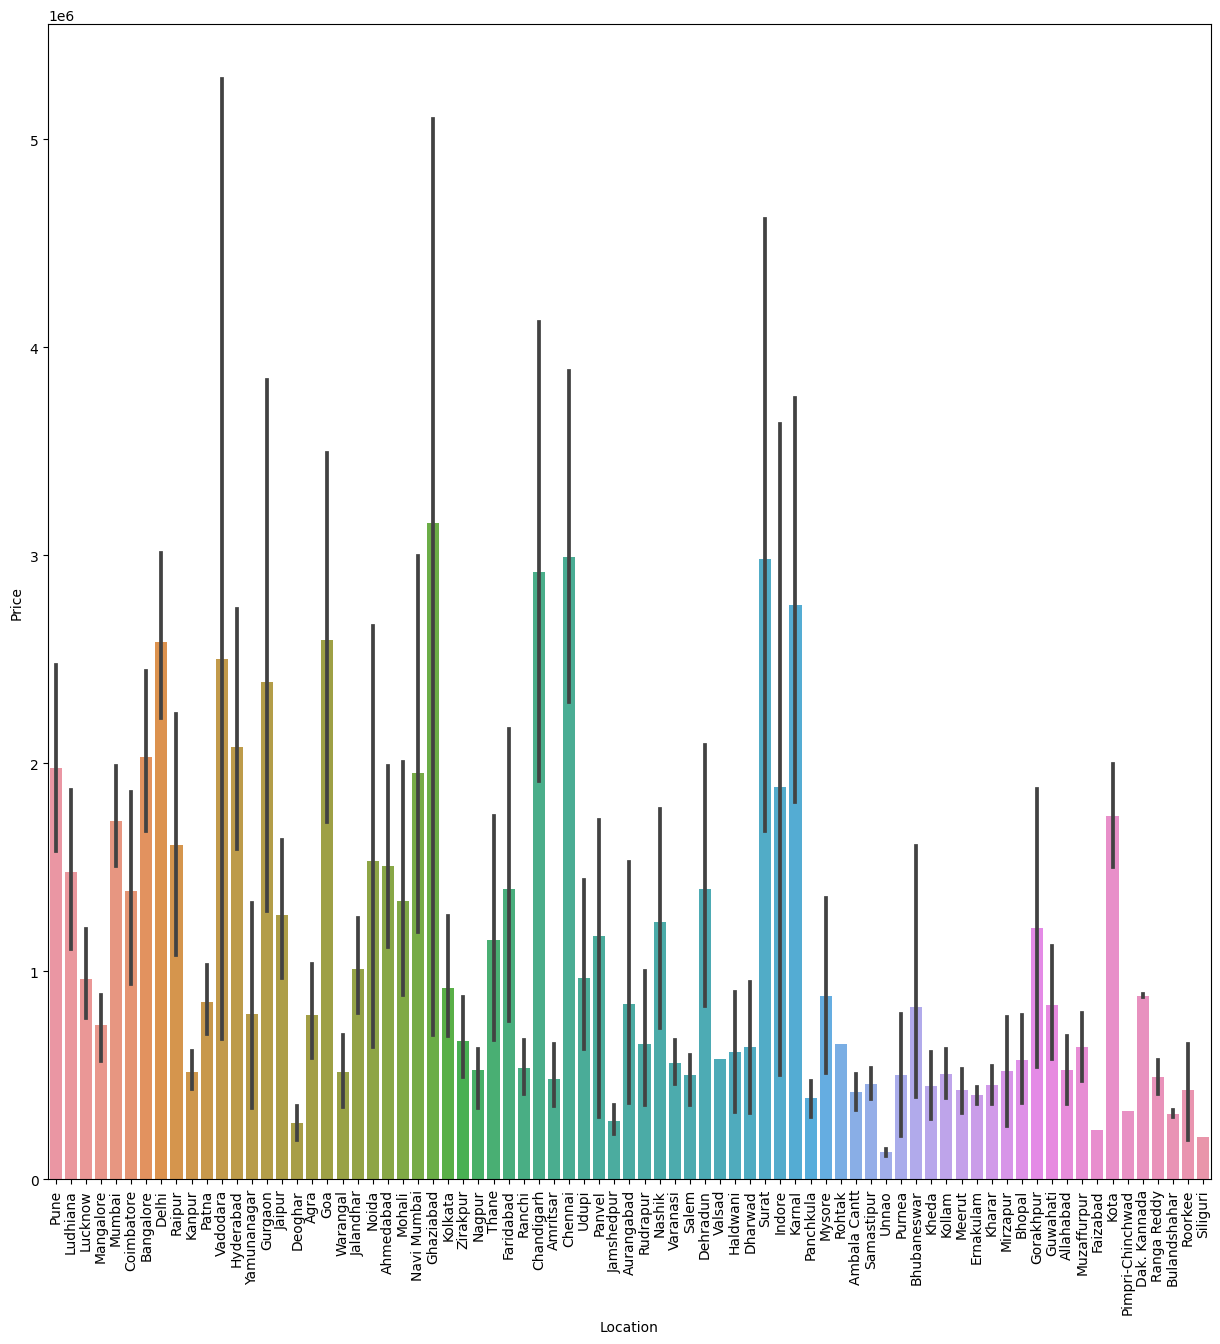

In [109]:
plt.figure(figsize=(15,15))
sns.barplot(x=car_data['Location'],y=car_data['Price'])
plt.xticks(rotation=90)
plt.show()

In [110]:
average_price_by_location=car_data.groupby('Location')['Price'].mean().to_frame().reset_index()

In [111]:
print(list(average_price_by_location['Location'].values))

['Agra', 'Ahmedabad', 'Allahabad', 'Ambala Cantt', 'Amritsar', 'Aurangabad', 'Bangalore', 'Bhopal', 'Bhubaneswar', 'Bulandshahar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Dak. Kannada', 'Dehradun', 'Delhi', 'Deoghar', 'Dharwad', 'Ernakulam', 'Faizabad', 'Faridabad', 'Ghaziabad', 'Goa', 'Gorakhpur', 'Gurgaon', 'Guwahati', 'Haldwani', 'Hyderabad', 'Indore', 'Jaipur', 'Jalandhar', 'Jamshedpur', 'Kanpur', 'Karnal', 'Kharar', 'Kheda', 'Kolkata', 'Kollam', 'Kota', 'Lucknow', 'Ludhiana', 'Mangalore', 'Meerut', 'Mirzapur', 'Mohali', 'Mumbai', 'Muzaffurpur', 'Mysore', 'Nagpur', 'Nashik', 'Navi Mumbai', 'Noida', 'Panchkula', 'Panvel', 'Patna', 'Pimpri-Chinchwad', 'Pune', 'Purnea', 'Raipur', 'Ranchi', 'Ranga Reddy', 'Rohtak', 'Roorkee', 'Rudrapur', 'Salem', 'Samastipur', 'Siliguri', 'Surat', 'Thane', 'Udupi', 'Unnao', 'Vadodara', 'Valsad', 'Varanasi', 'Warangal', 'Yamunanagar', 'Zirakpur']


In [112]:
average_price_by_location

,Location,Price
0,Agra,7.888947e+05
1,Ahmedabad,1.507257e+06
2,Allahabad,5.250000e+05
3,Ambala Cantt,4.183333e+05
4,Amritsar,4.837500e+05
...,...,...
72,Valsad,5.800000e+05
73,Varanasi,5.589583e+05
74,Warangal,5.150000e+05
75,Yamunanagar,7.941667e+05


In [113]:
joblib.dump(average_price_by_location.to_dict(),'location_price.pkl')

['location_price.pkl']

<Axes: >

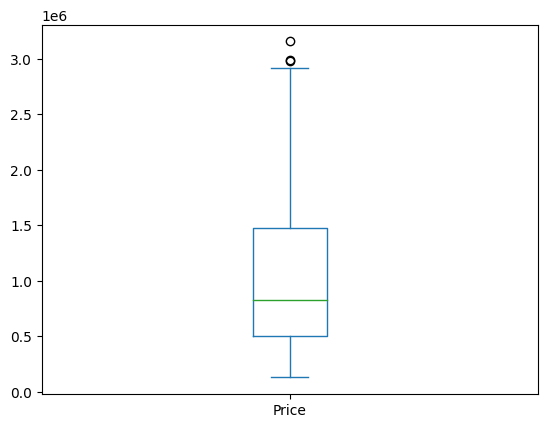

In [114]:
average_price_by_location['Price'].plot(kind='box')

In [115]:
#Now we give the cities the tag of whether they are costly or medium costly or low
tag=[]
for i in range(len(average_price_by_location)):
    avg_cost=average_price_by_location['Price'][i]
    if(avg_cost>3e6):
        tag.append('Extremely Costly')
    elif(avg_cost>1.5e6):
        tag.append('Costly')
    elif(avg_cost>1e6):
        tag.append('Medium Cost')
    elif(avg_cost>0.5e6):
        tag.append('Low Cost')
    else:
        tag.append('Very Low Cost')
average_price_by_location['Tag']=tag

In [116]:
average_price_by_location

,Location,Price,Tag
0,Agra,7.888947e+05,Low Cost
1,Ahmedabad,1.507257e+06,Costly
2,Allahabad,5.250000e+05,Low Cost
3,Ambala Cantt,4.183333e+05,Very Low Cost
4,Amritsar,4.837500e+05,Very Low Cost
...,...,...,...
72,Valsad,5.800000e+05,Low Cost
73,Varanasi,5.589583e+05,Low Cost
74,Warangal,5.150000e+05,Low Cost
75,Yamunanagar,7.941667e+05,Low Cost


In [117]:
location_to_tag=average_price_by_location.set_index('Location')['Tag'].to_dict()
car_data['Location']=car_data['Location'].map(location_to_tag)

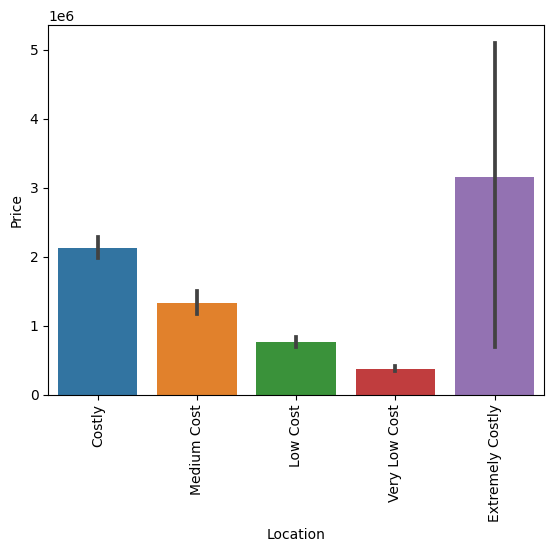

In [118]:
visualizeColumn('Location')

In [119]:
#This is a better categorization than city names
car_data['Color'].value_counts()

Color
White     802
Silver    285
Grey      220
Blue      190
Black     163
Red       154
Brown      82
Maroon     37
Gold       30
Bronze     28
Green      17
Orange     16
Others     12
Yellow      9
Beige       8
Purple      5
Pink        1
Name: count, dtype: int64

In [120]:
#We remove the single pink color column
car_data=car_data[car_data['Color']!='Pink']

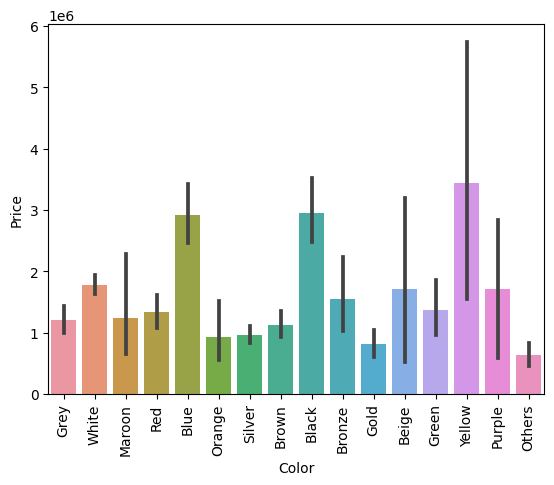

In [121]:
visualizeColumn('Color')

In [122]:
#Black, Blue and Yellow are the colors of car which cost the most, people may prefer the color of car
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2058 non-null   object 
 1   Price               2058 non-null   int64  
 2   Year                2058 non-null   int64  
 3   Kilometer           2058 non-null   int64  
 4   Fuel Type           2058 non-null   object 
 5   Transmission        2058 non-null   object 
 6   Location            2058 non-null   object 
 7   Color               2058 non-null   object 
 8   Owner               2058 non-null   object 
 9   Seller Type         2058 non-null   object 
 10  Drivetrain          2058 non-null   object 
 11  Length              2058 non-null   float64
 12  Width               2058 non-null   float64
 13  Height              2058 non-null   float64
 14  Seating Capacity    2058 non-null   float64
 15  Fuel Tank Capacity  2058 non-null   float64
 16  BHP        

In [123]:
car_data.columns

Index(['Make', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission',
       'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain', 'Length',
       'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'BHP',
       'RPM', 'Nm', 'RPM Torque'],
      dtype='object')

# Feature Construction

In [124]:
car_data['Size']=car_data['Length']*car_data['Width']*car_data['Height']

In [125]:
deleteColumn('Height')

Torque (Nm) = (BHP * 9,548) / RPM

In [126]:
#So we have Nm,BHP and RPM as correlated columns we remove the one having the least correlation with Price
deleteColumn('Nm')

In [127]:
car_data['Space']=car_data['Seating Capacity']/(car_data['Size'])

In [128]:
deleteColumn('Seating Capacity')

In [129]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2058 non-null   object 
 1   Price               2058 non-null   int64  
 2   Year                2058 non-null   int64  
 3   Kilometer           2058 non-null   int64  
 4   Fuel Type           2058 non-null   object 
 5   Transmission        2058 non-null   object 
 6   Location            2058 non-null   object 
 7   Color               2058 non-null   object 
 8   Owner               2058 non-null   object 
 9   Seller Type         2058 non-null   object 
 10  Drivetrain          2058 non-null   object 
 11  Length              2058 non-null   float64
 12  Width               2058 non-null   float64
 13  Fuel Tank Capacity  2058 non-null   float64
 14  BHP                 2058 non-null   float64
 15  RPM                 2058 non-null   float64
 16  RPM Torque 

In [130]:
numerical_features=['Price','Year','Kilometer','Length','Width','Fuel Tank Capacity','BHP','RPM','RPM Torque','Size','Space']

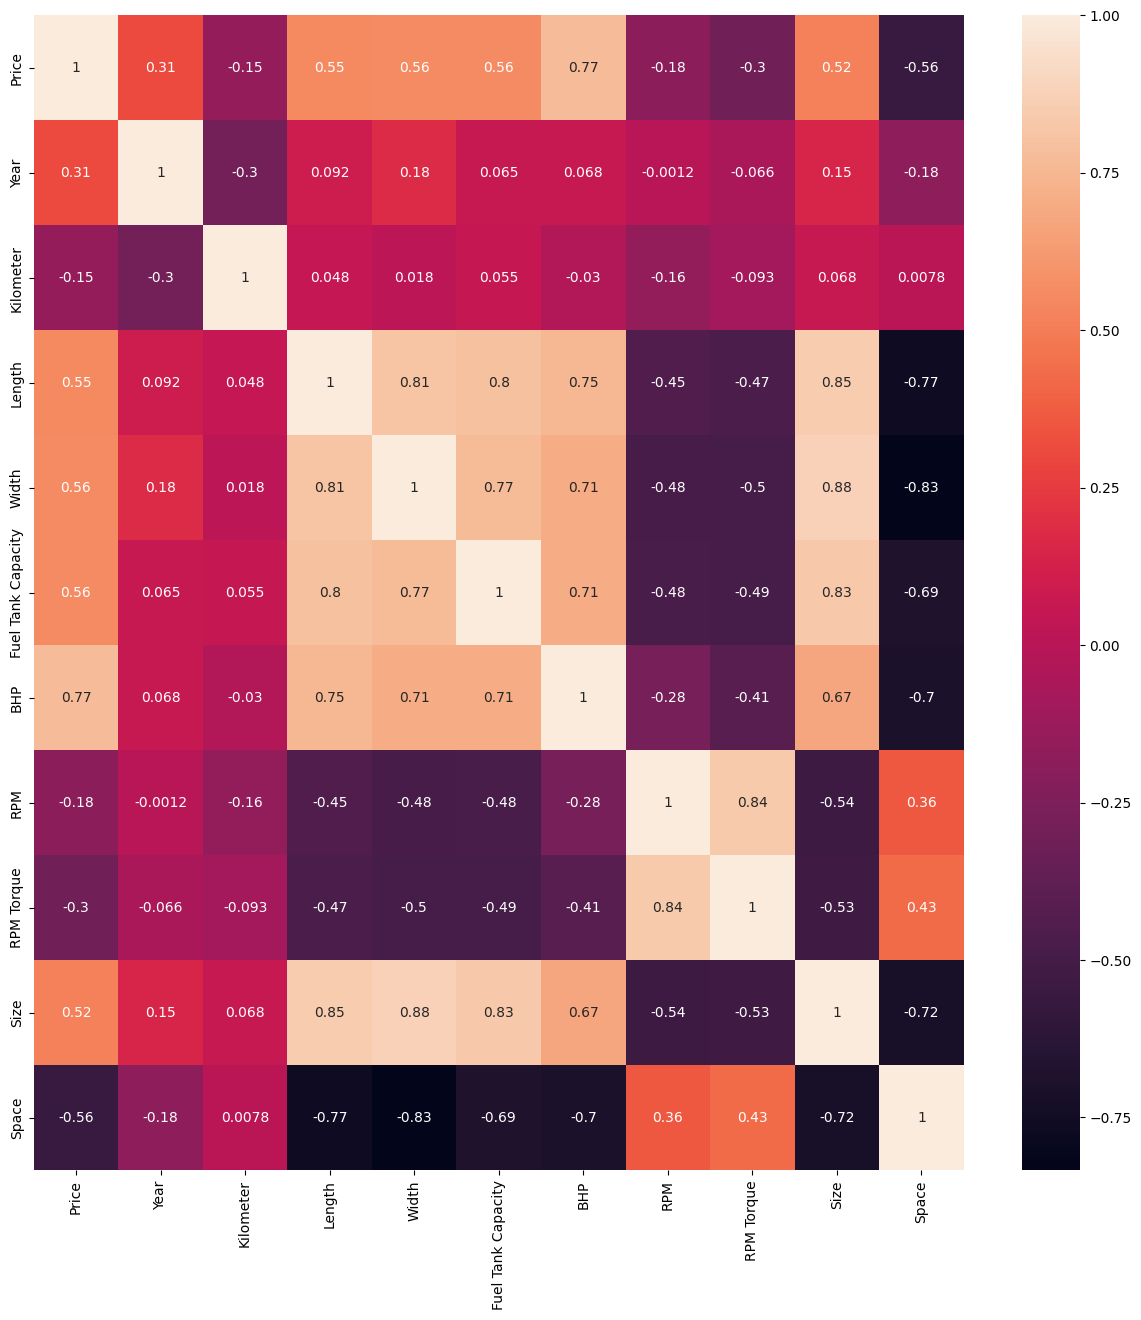

In [131]:
plt.figure(figsize=(15,15))
sns.heatmap(car_data[numerical_features].corr(),annot=True)
plt.show()

In [132]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2058 non-null   object 
 1   Price               2058 non-null   int64  
 2   Year                2058 non-null   int64  
 3   Kilometer           2058 non-null   int64  
 4   Fuel Type           2058 non-null   object 
 5   Transmission        2058 non-null   object 
 6   Location            2058 non-null   object 
 7   Color               2058 non-null   object 
 8   Owner               2058 non-null   object 
 9   Seller Type         2058 non-null   object 
 10  Drivetrain          2058 non-null   object 
 11  Length              2058 non-null   float64
 12  Width               2058 non-null   float64
 13  Fuel Tank Capacity  2058 non-null   float64
 14  BHP                 2058 non-null   float64
 15  RPM                 2058 non-null   float64
 16  RPM Torque 

In [133]:
car_data['Year']=car_data['Year'].apply(transformYear)

In [134]:
car_data['Price']=car_data['Price'].apply(np.log) #to make the target variable normal

In [135]:
pipe=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])

In [136]:
input_data=car_data.drop(columns=['Price'])
output_data=car_data['Price']

In [137]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.3,random_state=0)

In [138]:
ordinal_categories=[
    ['Very Old','Old','Medium Aged','New','Brand New'],
    ['Very Low Cost','Low Cost','Medium Cost','Costly','Extremely Costly'],
    ['4 or More','Fourth','Third','Second','First','UnRegistered Car']
]

In [139]:
numerical_columns=[2,10,11,12,13,14,15,16,17]
nominal_columns=[0,3,4,6,8,9]
ordinal_columns=[1,5,7]

In [140]:
numerical_transformer=StandardScaler()
nominal_transformer=OneHotEncoder(handle_unknown='ignore',drop='first')
ordinal_transformer=OrdinalEncoder(categories=ordinal_categories)

In [141]:
preprocessor=ColumnTransformer(
    [
        ('numerical',numerical_transformer,numerical_columns),
        ('nominal',nominal_transformer,nominal_columns),
        ('ordinal',ordinal_transformer,ordinal_columns)
    ],remainder='passthrough')

In [142]:
pipe=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',RandomForestRegressor())
])

In [143]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  [2, 10, 11, 12, 13, 14, 15,
                                                   16, 17]),
                                                 ('nominal',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [0, 3, 4, 6, 8, 9]),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Very '
                                                                              'Old',
                                                                              'Old',
                                                                              'Medium '
                                                                              'Aged',
                                                                              'New',
                                                                              'Brand '
                                                                              'New'],
                                                                             ['Very '
                                                                              'Low '
                                                                              'Cost',
                                                                              'Low '
                                                                              'Cost',
                                                                              'Medium '
                                                                              'Cost',
                                                                              'Costly',
                                                                              'Extremely '
                                                                              'Costly'],
                                                                             ['4 '
                                                                              'or '
                                                                              'More',
                                                                              'Fourth',
                                                                              'Third',
                                                                              'Second',
                                                                              'First',
                                                                              'UnRegistered '
                                                                              'Car']]),
                                                  [1, 5, 7])])),
                ('regressor', RandomForestRegressor())])

In [144]:
y_predicted=pipe.predict(x_test)

In [145]:
print(r2_score(y_test,y_predicted))

0.9345896653384249


# Linear Regression

In [2015]:
pipe=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])

In [2016]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  [2, 10, 11, 12, 13, 14, 15,
                                                   16, 17]),
                                                 ('nominal',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [0, 3, 4, 6, 8, 9]),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Very '
                                                                              'Old',
                                                                              'Old',
                                                                              'Medium '
                                                                              'Aged',
                                                                              'New',
                                                                              'Brand '
                                                                              'New'],
                                                                             ['Very '
                                                                              'Low '
                                                                              'Cost',
                                                                              'Low '
                                                                              'Cost',
                                                                              'Medium '
                                                                              'Cost',
                                                                              'Costly',
                                                                              'Extremely '
                                                                              'Costly'],
                                                                             ['4 '
                                                                              'or '
                                                                              'More',
                                                                              'Fourth',
                                                                              'Third',
                                                                              'Second',
                                                                              'First',
                                                                              'UnRegistered '
                                                                              'Car']]),
                                                  [1, 5, 7])])),
                ('regressor', LinearRegression())])

In [2017]:
y_predicted=pipe.predict(x_test)

In [2018]:
print('R2 Score :',r2_score(y_test,y_predicted))
print('Mean Squared Error :',mean_squared_error(y_test,y_predicted))

R2 Score : 0.9187833711692784
Mean Squared Error : 0.08049414737704287


# Support Vector Regressor

In [2032]:
pipe=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',SVR())
])

In [2033]:
param_grid = {
    'regressor__kernel': ['linear','rbf','poly'],
    'regressor__C': [0.1,1,5,10,20,40],
    'regressor__epsilon': [0.01,0.05,0.1,0.25,0.5]
}

In [2034]:
grid=GridSearchCV(pipe,param_grid=param_grid,cv=10)

In [2035]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         StandardScaler(),
                                                                         [2, 10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16,
                                                                          17]),
                                                                        ('nominal',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         [0, 3,
                                                                          4, 6,
                                                                          8,
                                                                          9]),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(categories=[['Very '
                                                                                                     'Old',
                                                                                                     'Old',
                                                                                                     'Medium '
                                                                                                     'Aged',
                                                                                                     'New',
                                                                                                     'Brand '
                                                                                                     'New'],
                                                                                                    ['Very '
                                                                                                     'Low '
                                                                                                     'Cost',
                                                                                                     'Low '
                                                                                                     'Cost',
                                                                                                     'Medium '
                                                                                                     'Cost',
                                                                                                     'Costly',
                                                                                                     'Extremely '
                                                                                                     'Costly'],
                                                                                                    ['4 '
                                                                                                     'or '
                                                                                                     'More',
                                                                                                     'Fourth',
               

In [2036]:
print('Best Hyperparameters :')
print(grid.best_params_)
y_predicted=grid.best_estimator_.predict(x_test)

Best Hyperparameters :
{'regressor__C': 10, 'regressor__epsilon': 0.05, 'regressor__kernel': 'rbf'}


In [2037]:
print('R2 Score :',r2_score(y_test,y_predicted))
print('Mean Squared Error :',mean_squared_error(y_test,y_predicted))

R2 Score : 0.9427627448344901
Mean Squared Error : 0.05672808781995634


# Decision Tree

In [1826]:
pipe=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',DecisionTreeRegressor())
])

In [1827]:
param_grid = {
    'regressor__max_depth': [None,5,10,20,40],
    'regressor__min_samples_split': [2,5,10,20,40],
    'regressor__min_samples_leaf': [1,2,4,8],
}

In [1828]:
grid=GridSearchCV(pipe,param_grid=param_grid,cv=10)

In [1829]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         StandardScaler(),
                                                                         [2, 10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16,
                                                                          17]),
                                                                        ('nominal',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         [0, 3,
                                                                          4, 6,
                                                                          8,
                                                                          9]),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(categories=[['Very '
                                                                                                     'Old',
                                                                                                     'Old',
                                                                                                     'Medium '
                                                                                                     'Aged',
                                                                                                     'New',
                                                                                                     'Brand '
                                                                                                     'New'],
                                                                                                    ['Very '
                                                                                                     'Low '
                                                                                                     'Cost',
                                                                                                     'Low '
                                                                                                     'Cost',
                                                                                                     'Medium '
                                                                                                     'Cost',
                                                                                                     'Costly',
                                                                                                     'Extremely '
                                                                                                     'Costly'],
                                                                                                    ['4 '
                                                                                                     'or '
                                                                                                     'More',
                                                                                                     'Fourth',
               

In [1830]:
print('Best Hyperparameters :')
print(grid.best_params_)
y_predicted=grid.best_estimator_.predict(x_test)

Best Hyperparameters :
{'regressor__max_depth': 20, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 20}


In [1831]:
print('R2 Score :',r2_score(y_test,y_predicted))
print('Mean Squared Error :',mean_squared_error(y_test,y_predicted))

R2 Score : 0.8930828521431647
Mean Squared Error : 0.10596604144526801


# Random Forest

In [1832]:
pipe=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',RandomForestRegressor())
])

In [1833]:
param_grid = {
    'regressor__n_estimators': [100,200,300],
    'regressor__max_depth': [2,5,10,20,40],
    'regressor__max_features': [2,4,8,10,16]
}

In [1834]:
grid=GridSearchCV(pipe,param_grid=param_grid,cv=10)

In [1835]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         StandardScaler(),
                                                                         [2, 10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16,
                                                                          17]),
                                                                        ('nominal',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         [0, 3,
                                                                          4, 6,
                                                                          8,
                                                                          9]),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(categories=[['Very '
                                                                                                     'Old',
                                                                                                     'Old',
                                                                                                     'Medium '
                                                                                                     'Aged',
                                                                                                     'New',
                                                                                                     'Brand '
                                                                                                     'New'],
                                                                                                    ['Very '
                                                                                                     'Low '
                                                                                                     'Cost',
                                                                                                     'Low '
                                                                                                     'Cost',
                                                                                                     'Medium '
                                                                                                     'Cost',
                                                                                                     'Costly',
                                                                                                     'Extremely '
                                                                                                     'Costly'],
                                                                                                    ['4 '
                                                                                                     'or '
                                                                                                     'More',
                                                                                                     'Fourth',
               

In [1836]:
print('Best Hyperparameters :')
print(grid.best_params_)
y_predicted=grid.best_estimator_.predict(x_test)

Best Hyperparameters :
{'regressor__max_depth': 20, 'regressor__max_features': 16, 'regressor__n_estimators': 300}


In [1837]:
print('R2 Score :',r2_score(y_test,y_predicted))
print('Mean Squared Error :',mean_squared_error(y_test,y_predicted))

R2 Score : 0.9369763402749165
Mean Squared Error : 0.06246301806893652


# AdaBoost Regression

In [1994]:
pipe=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',AdaBoostRegressor())
])

In [1995]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  [2, 10, 11, 12, 13, 14, 15,
                                                   16, 17]),
                                                 ('nominal',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [0, 3, 4, 6, 8, 9]),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Very '
                                                                              'Old',
                                                                              'Old',
                                                                              'Medium '
                                                                              'Aged',
                                                                              'New',
                                                                              'Brand '
                                                                              'New'],
                                                                             ['Very '
                                                                              'Low '
                                                                              'Cost',
                                                                              'Low '
                                                                              'Cost',
                                                                              'Medium '
                                                                              'Cost',
                                                                              'Costly',
                                                                              'Extremely '
                                                                              'Costly'],
                                                                             ['4 '
                                                                              'or '
                                                                              'More',
                                                                              'Fourth',
                                                                              'Third',
                                                                              'Second',
                                                                              'First',
                                                                              'UnRegistered '
                                                                              'Car']]),
                                                  [1, 5, 7])])),
                ('regressor', AdaBoostRegressor())])

In [1996]:
y_predicted=pipe.predict(x_test)

In [1997]:
print('R2 Score :',r2_score(y_test,y_predicted))
print('Mean Squared Error :',mean_squared_error(y_test,y_predicted))

R2 Score : 0.8711566919593935
Mean Squared Error : 0.12769715236005053


# Ridge Regression

In [1998]:
pipe=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',Ridge())
])

In [1999]:
param_grid={
    'regressor__alpha': [0.1, 1.0, 10.0]
}

In [2000]:
grid=GridSearchCV(pipe,param_grid=param_grid,cv=10)

In [2001]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         StandardScaler(),
                                                                         [2, 10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16,
                                                                          17]),
                                                                        ('nominal',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         [0, 3,
                                                                          4, 6,
                                                                          8,
                                                                          9]),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(categories=[['Very '
                                                                                                     'Old',
                                                                                                     'Old',
                                                                                                     'Medium '
                                                                                                     'Aged',
                                                                                                     'New',
                                                                                                     'Brand '
                                                                                                     'New'],
                                                                                                    ['Very '
                                                                                                     'Low '
                                                                                                     'Cost',
                                                                                                     'Low '
                                                                                                     'Cost',
                                                                                                     'Medium '
                                                                                                     'Cost',
                                                                                                     'Costly',
                                                                                                     'Extremely '
                                                                                                     'Costly'],
                                                                                                    ['4 '
                                                                                                     'or '
                                                                                                     'More',
                                                                                                     'Fourth',
               

In [2002]:
print('Best Hyperparameters :')
print(grid.best_params_)
y_predicted=grid.best_estimator_.predict(x_test)

Best Hyperparameters :
{'regressor__alpha': 0.1}


In [2003]:
print('R2 Score :',r2_score(y_test,y_predicted))
print('Mean Squared Error :',mean_squared_error(y_test,y_predicted))

R2 Score : 0.9199867921001078
Mean Squared Error : 0.07930143175762587


# Lasso Regression

In [2004]:
pipe=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',Lasso())
])

In [2005]:
param_grid={
    'regressor__alpha': [0.1, 1.0, 10.0]
}

In [2006]:
grid=GridSearchCV(pipe,param_grid=param_grid,cv=10)

In [2007]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         StandardScaler(),
                                                                         [2, 10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16,
                                                                          17]),
                                                                        ('nominal',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         [0, 3,
                                                                          4, 6,
                                                                          8,
                                                                          9]),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(categories=[['Very '
                                                                                                     'Old',
                                                                                                     'Old',
                                                                                                     'Medium '
                                                                                                     'Aged',
                                                                                                     'New',
                                                                                                     'Brand '
                                                                                                     'New'],
                                                                                                    ['Very '
                                                                                                     'Low '
                                                                                                     'Cost',
                                                                                                     'Low '
                                                                                                     'Cost',
                                                                                                     'Medium '
                                                                                                     'Cost',
                                                                                                     'Costly',
                                                                                                     'Extremely '
                                                                                                     'Costly'],
                                                                                                    ['4 '
                                                                                                     'or '
                                                                                                     'More',
                                                                                                     'Fourth',
               

In [2008]:
print('Best Hyperparameters :')
print(grid.best_params_)
y_predicted=grid.best_estimator_.predict(x_test)

Best Hyperparameters :
{'regressor__alpha': 0.1}


In [2009]:
print('R2 Score :',r2_score(y_test,y_predicted))
print('Mean Squared Error :',mean_squared_error(y_test,y_predicted))

R2 Score : 0.8276192483346952
Mean Squared Error : 0.1708472985062362


So the best results are given by the following 3 algorithms
1) SVM

2) Random Forest

3) Ridge Regression


We try using voting regressor with these 3 algorithms if the result improves

# Voting Regressor

In [2038]:
model1=SVR(C=10,epsilon=0.05,kernel='rbf')
model2=RandomForestRegressor(max_depth=20,max_features=16,n_estimators=300)
model3=Ridge(alpha=0.1)
voting_regressor=VotingRegressor(estimators=[('svr',model1),('rf',model2),('ridge',model3)])

In [2039]:
pipe=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',voting_regressor)
])

In [2040]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  [2, 10, 11, 12, 13, 14, 15,
                                                   16, 17]),
                                                 ('nominal',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [0, 3, 4, 6, 8, 9]),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Very '
                                                                              'Old',
                                                                              'Old',
                                                                              'Medium '
                                                                              'Aged',
                                                                              'New',
                                                                              'Brand '
                                                                              'New'],
                                                                             ['Very '
                                                                              'Low '
                                                                              'Cost',
                                                                              'Low '
                                                                              'Cost',
                                                                              'Medium '
                                                                              'Cost',
                                                                              'Costly',
                                                                              'Extremely '
                                                                              'Costly'],
                                                                             ['4 '
                                                                              'or '
                                                                              'More',
                                                                              'Fourth',
                                                                              'Third',
                                                                              'Second',
                                                                              'First',
                                                                              'UnRegistered '
                                                                              'Car']]),
                                                  [1, 5, 7])])),
                ('regressor',
                 VotingRegressor(estimators=[('svr', SVR(C=10, epsilon=0.05)),
                                             ('rf',
                                              RandomForestRegressor(max_depth=20,
                                                                    max_features=16,
                                                                    n_estimators=300)),
                                             ('ridge', Ridge(alpha=0.1))]))])

In [2041]:
y_predicted=pipe.predict(x_test)

In [2042]:
print('R2 Score :',r2_score(y_test,y_predicted))
print('Mean Squared Error :',mean_squared_error(y_test,y_predicted))

R2 Score : 0.9465184009834188
Mean Squared Error : 0.053005840985758584


# Stacking Regressor

In [2043]:
model1=SVR(C=10,epsilon=0.05,kernel='rbf')
model2=RandomForestRegressor(max_depth=20,max_features=16,n_estimators=300)
model3=Ridge(alpha=0.1)
stacking_regressor=StackingRegressor(estimators=[('svr',model1),('rf',model2),('ridge',model3)])

In [2044]:
pipe=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',stacking_regressor)
])

In [2045]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  [2, 10, 11, 12, 13, 14, 15,
                                                   16, 17]),
                                                 ('nominal',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [0, 3, 4, 6, 8, 9]),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Very '
                                                                              'Old',
                                                                              'Old',
                                                                              'Medium '
                                                                              'Aged',
                                                                              'New',
                                                                              'Brand '
                                                                              'New'],
                                                                             ['Very '
                                                                              'Low '
                                                                              'Cost',
                                                                              'Low '
                                                                              'Cost',
                                                                              'Medium '
                                                                              'Cost',
                                                                              'Costly',
                                                                              'Extremely '
                                                                              'Costly'],
                                                                             ['4 '
                                                                              'or '
                                                                              'More',
                                                                              'Fourth',
                                                                              'Third',
                                                                              'Second',
                                                                              'First',
                                                                              'UnRegistered '
                                                                              'Car']]),
                                                  [1, 5, 7])])),
                ('regressor',
                 StackingRegressor(estimators=[('svr', SVR(C=10, epsilon=0.05)),
                                               ('rf',
                                                RandomForestRegressor(max_depth=20,
                                                                      max_features=16,
                                                                      n_estimators=300)),
                                               ('ridge', Ridge(alpha=0.1))]))])

In [2046]:
y_predicted=pipe.predict(x_test)

In [2047]:
print('R2 Score :',r2_score(y_test,y_predicted))
print('Mean Squared Error :',mean_squared_error(y_test,y_predicted))

R2 Score : 0.9479230686879545
Mean Squared Error : 0.05161366883022206


In [146]:
#So stacking/voting regressor did not produce much difference in results so we use SVR only
pipe=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',SVR(C=10,epsilon=0.05,kernel='rbf'))
])

In [147]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  [2, 10, 11, 12, 13, 14, 15,
                                                   16, 17]),
                                                 ('nominal',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [0, 3, 4, 6, 8, 9]),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Very '
                                                                              'Old',
                                                                              'Old',
                                                                              'Medium '
                                                                              'Aged',
                                                                              'New',
                                                                              'Brand '
                                                                              'New'],
                                                                             ['Very '
                                                                              'Low '
                                                                              'Cost',
                                                                              'Low '
                                                                              'Cost',
                                                                              'Medium '
                                                                              'Cost',
                                                                              'Costly',
                                                                              'Extremely '
                                                                              'Costly'],
                                                                             ['4 '
                                                                              'or '
                                                                              'More',
                                                                              'Fourth',
                                                                              'Third',
                                                                              'Second',
                                                                              'First',
                                                                              'UnRegistered '
                                                                              'Car']]),
                                                  [1, 5, 7])])),
                ('regressor', SVR(C=10, epsilon=0.05))])

In [148]:
y_predicted=pipe.predict(x_test)

<Axes: xlabel='Price', ylabel='Density'>

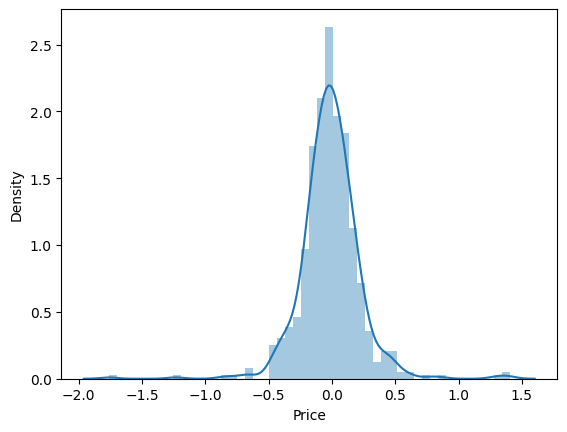

In [149]:
sns.distplot(y_test-y_predicted)

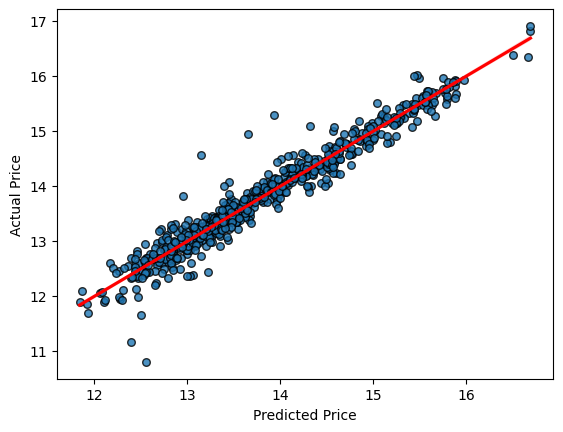

In [150]:
#So graph is nearly a normal distribution showing that the model is very well trained
sns.regplot(x=y_predicted,y=y_test,line_kws={'color':'red'},scatter_kws={'s':30,'edgecolor':'black'})
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()

In [151]:
#Clearly our model trained gives very good results
data=car_data.to_dict()

# Exporting the Model

In [152]:
joblib.dump(pipe,'pipeline.pkl')
joblib.dump(data,'data.pkl')

['data.pkl']